In [1]:
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import torch
import sys
# setting path 
sys.path.append('../')
from NeuralNetworks.NNs import FCFF_3L
from PointSampling.Ball import data_gen_ball_unif
from visualization.plots_disc import plot_2d_proj_disc
from visualization.disc_training import plot_2d_proj_w
from Hamiltonians.Eikonal_LxF import Eikonal_sq_LF_multiD 
from Training.training_finite_sum import train_finite_sum
from error_test.cube_error import FD_loss
from error_test.disc_error import error_ball

dim = 2

radii = [3., 0.]
domain = data_gen_ball_unif(radii, dim)

#Right-hand-side of the PDE
def f(X): return 1

#Boundary condition
def g(X): return 0

delta_list = [.7, .5, .2, .1, .05]
alpha_list = [2., 2., 2., 2., 2.]
rounds = len(delta_list)
training_params = {
    'numerical_scheme': Eikonal_sq_LF_multiD,
    
    'f': f, 
    'g': g, 
    'c': None,
    
    'beta': 0., ## parameter for the +u_i term 
    
    'lambda': 1. #weight parameter for the boundary loss
}

# Test data
x_grid = torch.linspace(-max(radii), max(radii), int(601))
print('delta_test = ', x_grid[1]-x_grid[0] )
X,Y = torch.meshgrid(x_grid, x_grid)
data_square = torch.cat((X.unsqueeze(-1), Y.unsqueeze(-1)), dim = -1).reshape([-1, 2])
test_data = data_square[data_square.norm(dim = -1) < max(radii)]
print('Number of test points =', test_data.shape[0])

n_experiments = 10

delta_test =  tensor(0.0100)
Number of test points = 282677


/Users/carlosesteveyague/anaconda3/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666647174771/work/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


# Fixed collocation points I

100%|██████████| 500/500 [00:05<00:00, 84.55it/s]
../visualization/disc_training.py:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(GridX.detach(), GridY.detach(), W.detach())


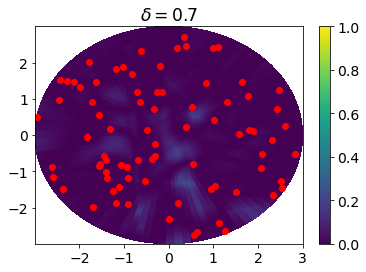

  2%|▏         | 8/500 [00:00<00:06, 73.78it/s]

Mean square error: tensor(0.0731)
L-infinity error: tensor(1.1441)


100%|██████████| 500/500 [00:07<00:00, 69.39it/s]


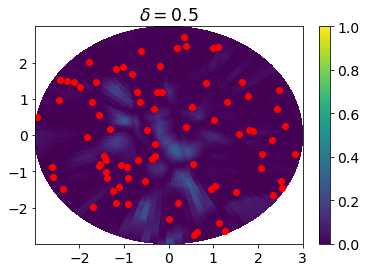

  2%|▏         | 9/500 [00:00<00:05, 81.95it/s]

Mean square error: tensor(0.0374)
L-infinity error: tensor(0.9421)


100%|██████████| 500/500 [00:05<00:00, 84.48it/s]


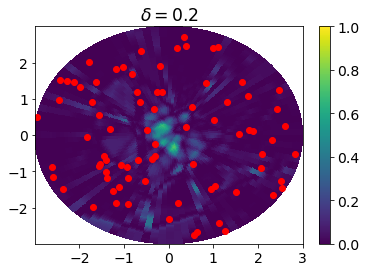

  2%|▏         | 8/500 [00:00<00:06, 77.89it/s]

Mean square error: tensor(0.0116)
L-infinity error: tensor(0.6567)


100%|██████████| 500/500 [00:06<00:00, 81.67it/s]


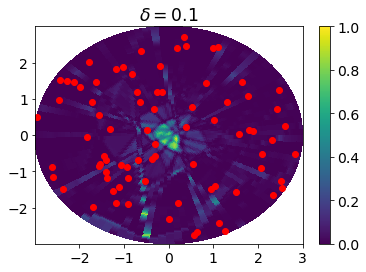

  2%|▏         | 8/500 [00:00<00:06, 76.20it/s]

Mean square error: tensor(0.0042)
L-infinity error: tensor(0.4872)


100%|██████████| 500/500 [00:05<00:00, 84.53it/s]


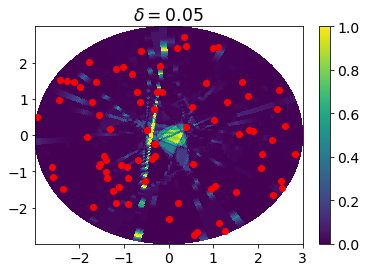

  1%|          | 5/500 [00:00<00:10, 47.10it/s]

Mean square error: tensor(0.0055)
L-infinity error: tensor(0.4586)


100%|██████████| 500/500 [00:07<00:00, 70.57it/s]


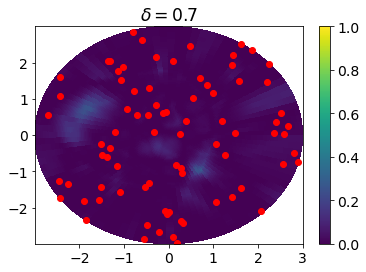

  2%|▏         | 9/500 [00:00<00:05, 84.28it/s]

Mean square error: tensor(0.0719)
L-infinity error: tensor(1.1140)


100%|██████████| 500/500 [00:06<00:00, 72.74it/s]


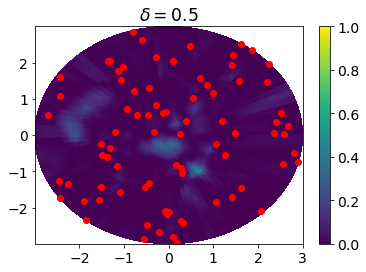

  2%|▏         | 9/500 [00:00<00:06, 81.60it/s]

Mean square error: tensor(0.0397)
L-infinity error: tensor(0.9316)


100%|██████████| 500/500 [00:06<00:00, 76.77it/s]


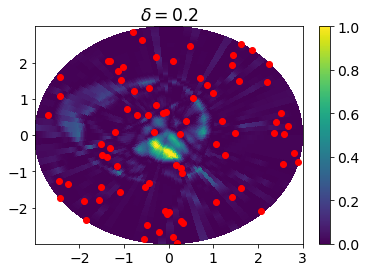

  2%|▏         | 8/500 [00:00<00:06, 78.16it/s]

Mean square error: tensor(0.0131)
L-infinity error: tensor(0.6741)


100%|██████████| 500/500 [00:05<00:00, 85.78it/s]


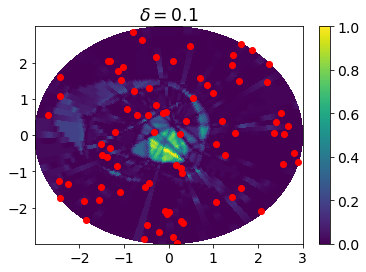

  2%|▏         | 9/500 [00:00<00:05, 84.33it/s]

Mean square error: tensor(0.0073)
L-infinity error: tensor(0.5623)


100%|██████████| 500/500 [00:05<00:00, 86.93it/s]


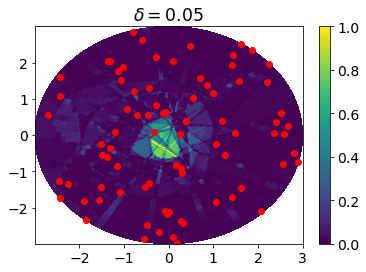

  2%|▏         | 9/500 [00:00<00:05, 85.59it/s]

Mean square error: tensor(0.0051)
L-infinity error: tensor(0.4969)


100%|██████████| 500/500 [00:05<00:00, 86.10it/s]


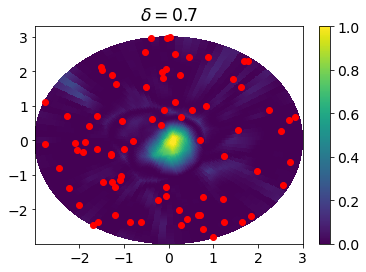

  2%|▏         | 9/500 [00:00<00:05, 86.44it/s]

Mean square error: tensor(0.0870)
L-infinity error: tensor(1.3366)


100%|██████████| 500/500 [00:05<00:00, 86.72it/s]


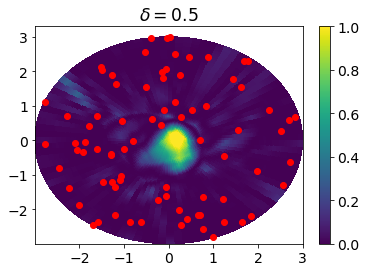

  2%|▏         | 9/500 [00:00<00:05, 84.43it/s]

Mean square error: tensor(0.0518)
L-infinity error: tensor(1.1497)


100%|██████████| 500/500 [00:05<00:00, 87.25it/s]


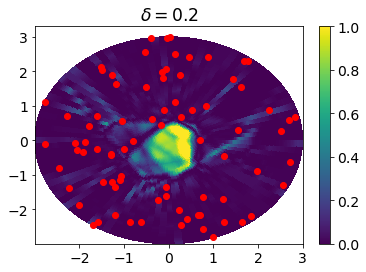

  2%|▏         | 9/500 [00:00<00:05, 84.90it/s]

Mean square error: tensor(0.0169)
L-infinity error: tensor(0.8888)


100%|██████████| 500/500 [00:05<00:00, 85.64it/s]


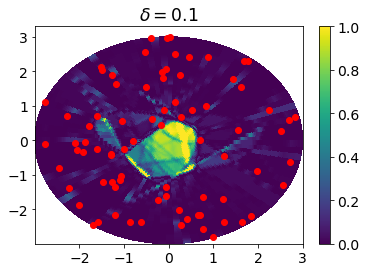

  2%|▏         | 9/500 [00:00<00:05, 84.61it/s]

Mean square error: tensor(0.0139)
L-infinity error: tensor(0.8264)


100%|██████████| 500/500 [00:05<00:00, 86.08it/s]


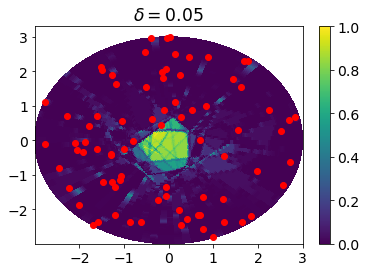

  2%|▏         | 9/500 [00:00<00:05, 82.88it/s]

Mean square error: tensor(0.0053)
L-infinity error: tensor(0.6211)


100%|██████████| 500/500 [00:05<00:00, 86.82it/s]


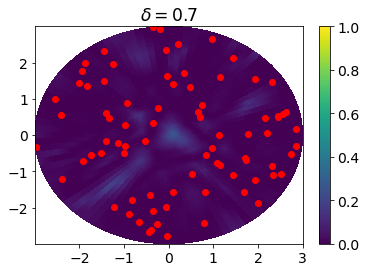

  2%|▏         | 9/500 [00:00<00:05, 85.44it/s]

Mean square error: tensor(0.0766)
L-infinity error: tensor(1.1840)


100%|██████████| 500/500 [00:05<00:00, 86.08it/s]


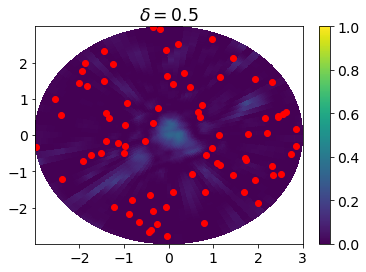

  2%|▏         | 9/500 [00:00<00:05, 85.20it/s]

Mean square error: tensor(0.0432)
L-infinity error: tensor(1.0083)


100%|██████████| 500/500 [00:05<00:00, 85.91it/s]


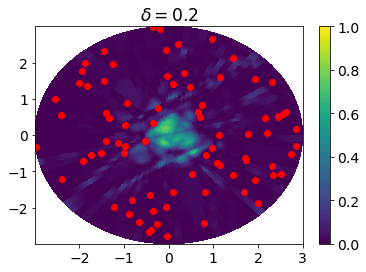

  2%|▏         | 9/500 [00:00<00:05, 83.84it/s]

Mean square error: tensor(0.0127)
L-infinity error: tensor(0.7487)


100%|██████████| 500/500 [00:05<00:00, 84.96it/s]


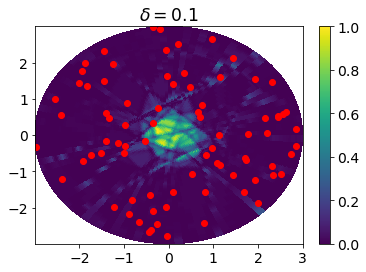

  2%|▏         | 9/500 [00:00<00:05, 82.66it/s]

Mean square error: tensor(0.0062)
L-infinity error: tensor(0.6298)


100%|██████████| 500/500 [00:05<00:00, 87.39it/s]


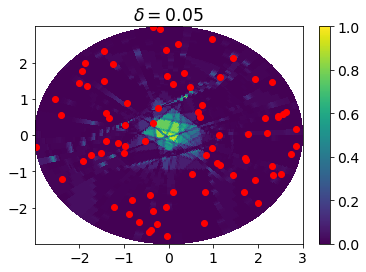

  2%|▏         | 9/500 [00:00<00:05, 85.35it/s]

Mean square error: tensor(0.0030)
L-infinity error: tensor(0.4558)


100%|██████████| 500/500 [00:05<00:00, 87.29it/s]


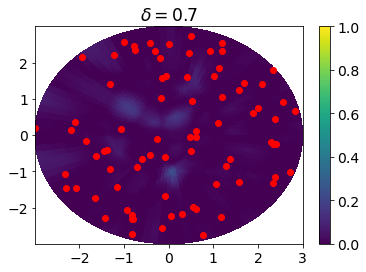

  2%|▏         | 9/500 [00:00<00:05, 85.48it/s]

Mean square error: tensor(0.0702)
L-infinity error: tensor(1.1102)


100%|██████████| 500/500 [00:05<00:00, 87.33it/s]


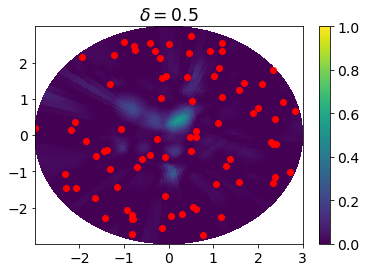

  2%|▏         | 9/500 [00:00<00:05, 86.98it/s]

Mean square error: tensor(0.0416)
L-infinity error: tensor(0.9669)


100%|██████████| 500/500 [00:05<00:00, 84.39it/s]


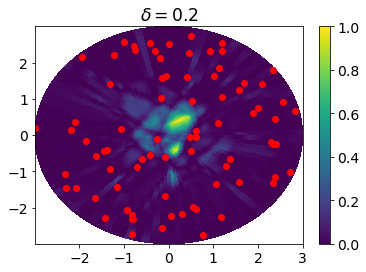

  2%|▏         | 9/500 [00:00<00:05, 83.01it/s]

Mean square error: tensor(0.0110)
L-infinity error: tensor(0.6978)


100%|██████████| 500/500 [00:05<00:00, 86.19it/s]


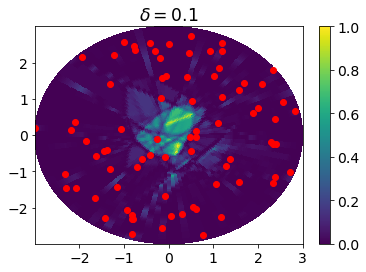

  2%|▏         | 9/500 [00:00<00:05, 83.56it/s]

Mean square error: tensor(0.0060)
L-infinity error: tensor(0.5882)


100%|██████████| 500/500 [00:05<00:00, 85.18it/s]


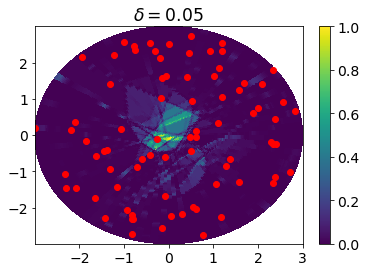

  2%|▏         | 8/500 [00:00<00:06, 79.74it/s]

Mean square error: tensor(0.0036)
L-infinity error: tensor(0.4669)


100%|██████████| 500/500 [00:06<00:00, 75.09it/s]


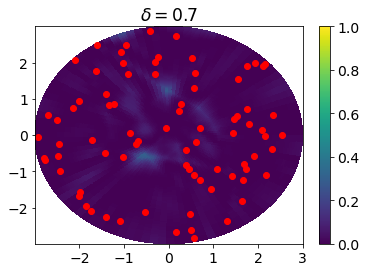

  1%|▏         | 7/500 [00:00<00:07, 69.50it/s]

Mean square error: tensor(0.0680)
L-infinity error: tensor(1.0566)


100%|██████████| 500/500 [00:06<00:00, 72.73it/s]


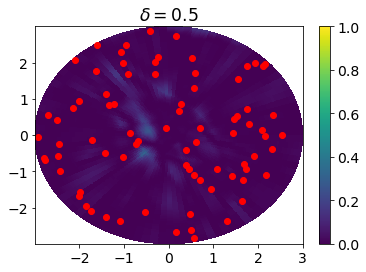

  2%|▏         | 9/500 [00:00<00:05, 82.33it/s]

Mean square error: tensor(0.0346)
L-infinity error: tensor(0.8777)


100%|██████████| 500/500 [00:06<00:00, 74.54it/s]


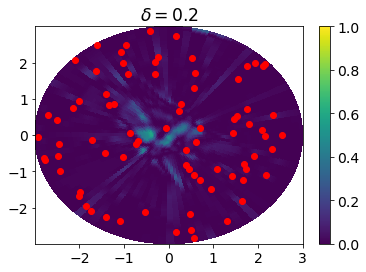

  1%|▏         | 7/500 [00:00<00:07, 65.44it/s]

Mean square error: tensor(0.0092)
L-infinity error: tensor(0.5896)


100%|██████████| 500/500 [00:07<00:00, 67.93it/s]


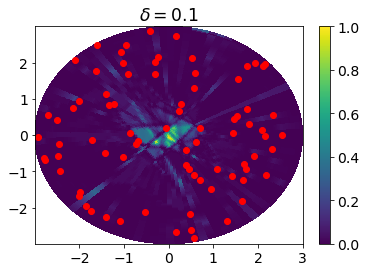

  1%|          | 6/500 [00:00<00:08, 57.15it/s]

Mean square error: tensor(0.0040)
L-infinity error: tensor(0.4839)


100%|██████████| 500/500 [00:06<00:00, 80.36it/s]


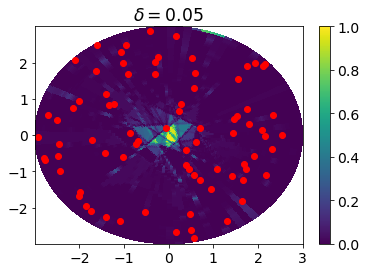

  2%|▏         | 8/500 [00:00<00:06, 78.29it/s]

Mean square error: tensor(0.0018)
L-infinity error: tensor(0.3975)


100%|██████████| 500/500 [00:05<00:00, 83.53it/s]


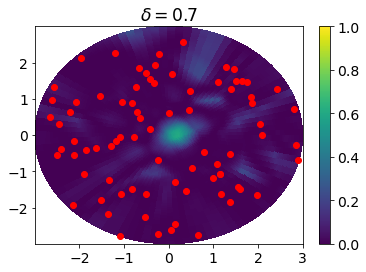

  2%|▏         | 9/500 [00:00<00:05, 82.86it/s]

Mean square error: tensor(0.0876)
L-infinity error: tensor(1.2648)


100%|██████████| 500/500 [00:06<00:00, 81.23it/s]


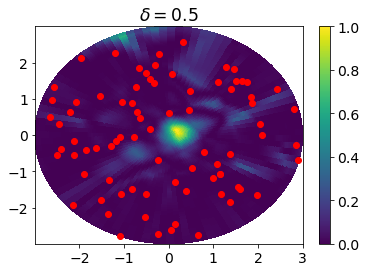

  2%|▏         | 8/500 [00:00<00:06, 73.61it/s]

Mean square error: tensor(0.0533)
L-infinity error: tensor(1.0993)


100%|██████████| 500/500 [00:07<00:00, 71.19it/s]


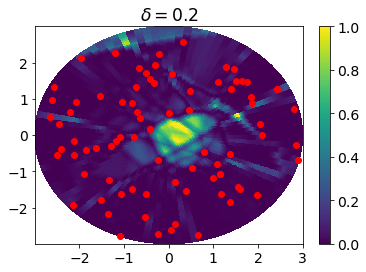

  2%|▏         | 8/500 [00:00<00:06, 72.39it/s]

Mean square error: tensor(0.0208)
L-infinity error: tensor(0.8484)


100%|██████████| 500/500 [00:06<00:00, 81.20it/s]


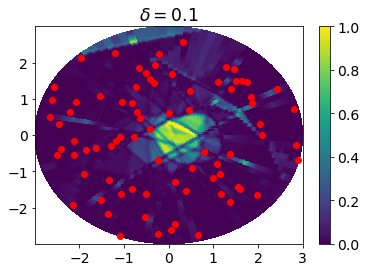

  2%|▏         | 9/500 [00:00<00:05, 85.39it/s]

Mean square error: tensor(0.0125)
L-infinity error: tensor(0.7289)


100%|██████████| 500/500 [00:05<00:00, 83.97it/s]


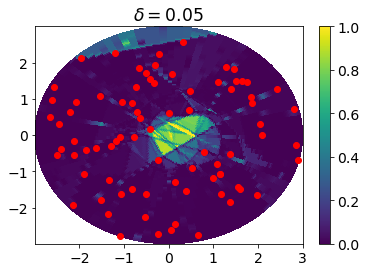

  2%|▏         | 9/500 [00:00<00:05, 84.28it/s]

Mean square error: tensor(0.0105)
L-infinity error: tensor(0.6499)


100%|██████████| 500/500 [00:06<00:00, 83.01it/s]


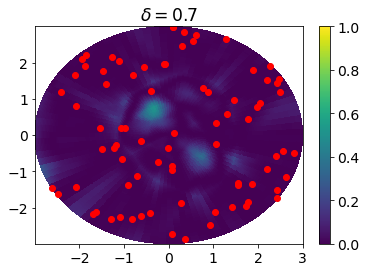

  2%|▏         | 9/500 [00:00<00:05, 83.41it/s]

Mean square error: tensor(0.0701)
L-infinity error: tensor(1.1027)


100%|██████████| 500/500 [00:06<00:00, 80.41it/s]


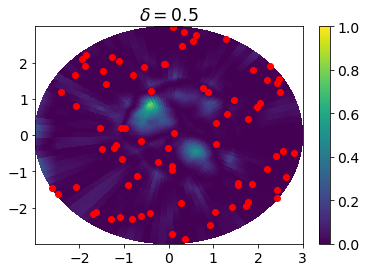

  2%|▏         | 9/500 [00:00<00:06, 81.67it/s]

Mean square error: tensor(0.0365)
L-infinity error: tensor(0.9038)


100%|██████████| 500/500 [00:06<00:00, 82.94it/s]


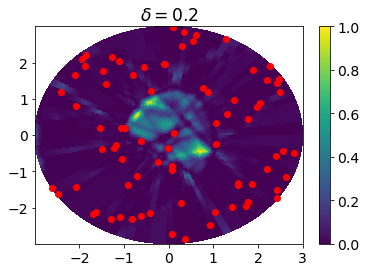

  2%|▏         | 9/500 [00:00<00:05, 83.04it/s]

Mean square error: tensor(0.0126)
L-infinity error: tensor(0.6635)


100%|██████████| 500/500 [00:05<00:00, 84.09it/s]


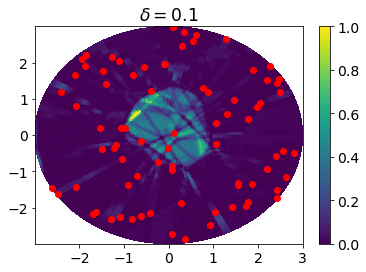

  2%|▏         | 9/500 [00:00<00:05, 82.12it/s]

Mean square error: tensor(0.0069)
L-infinity error: tensor(0.5782)


100%|██████████| 500/500 [00:05<00:00, 84.61it/s]


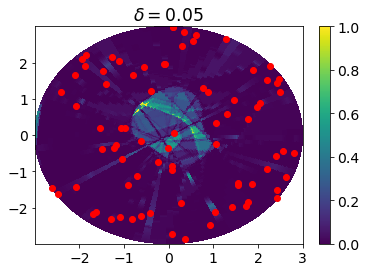

  2%|▏         | 9/500 [00:00<00:05, 85.12it/s]

Mean square error: tensor(0.0044)
L-infinity error: tensor(0.4512)


100%|██████████| 500/500 [00:05<00:00, 85.04it/s]


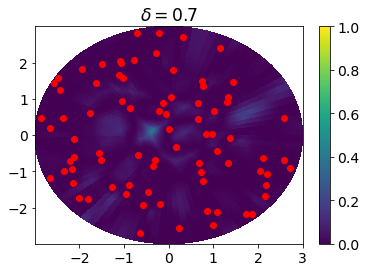

  2%|▏         | 9/500 [00:00<00:05, 82.25it/s]

Mean square error: tensor(0.0710)
L-infinity error: tensor(1.0837)


100%|██████████| 500/500 [00:05<00:00, 85.25it/s]


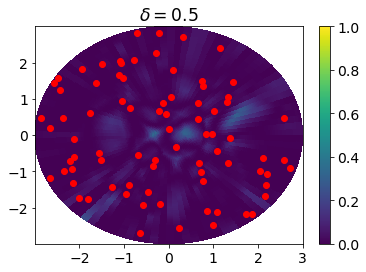

  2%|▏         | 9/500 [00:00<00:05, 84.18it/s]

Mean square error: tensor(0.0398)
L-infinity error: tensor(0.8981)


100%|██████████| 500/500 [00:05<00:00, 86.09it/s]


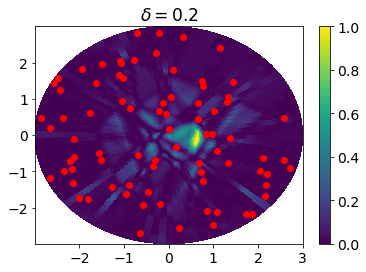

  2%|▏         | 9/500 [00:00<00:05, 85.48it/s]

Mean square error: tensor(0.0144)
L-infinity error: tensor(0.6789)


100%|██████████| 500/500 [00:05<00:00, 84.73it/s]


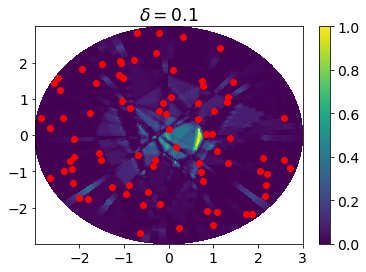

  2%|▏         | 9/500 [00:00<00:05, 85.35it/s]

Mean square error: tensor(0.0081)
L-infinity error: tensor(0.5545)


100%|██████████| 500/500 [00:05<00:00, 85.38it/s]


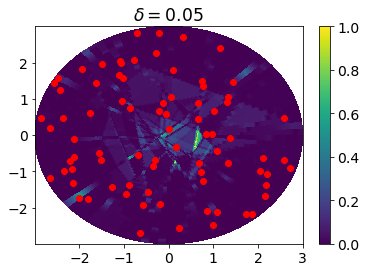

  2%|▏         | 9/500 [00:00<00:05, 84.58it/s]

Mean square error: tensor(0.0047)
L-infinity error: tensor(0.3909)


100%|██████████| 500/500 [00:05<00:00, 85.82it/s]


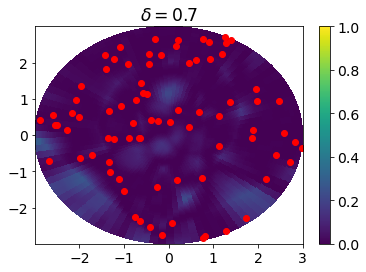

  2%|▏         | 9/500 [00:00<00:05, 83.13it/s]

Mean square error: tensor(0.0862)
L-infinity error: tensor(1.1828)


100%|██████████| 500/500 [00:05<00:00, 85.94it/s]


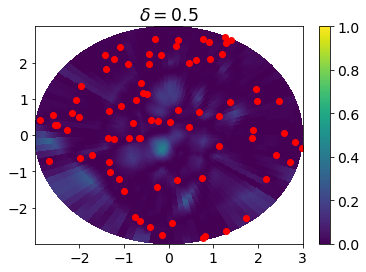

  2%|▏         | 9/500 [00:00<00:05, 84.26it/s]

Mean square error: tensor(0.0496)
L-infinity error: tensor(0.9927)


100%|██████████| 500/500 [00:05<00:00, 86.57it/s]


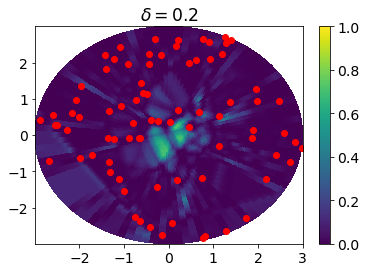

  2%|▏         | 9/500 [00:00<00:05, 86.00it/s]

Mean square error: tensor(0.0161)
L-infinity error: tensor(0.7178)


100%|██████████| 500/500 [00:05<00:00, 85.10it/s]


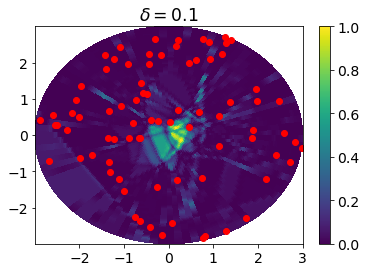

  2%|▏         | 9/500 [00:00<00:05, 84.13it/s]

Mean square error: tensor(0.0083)
L-infinity error: tensor(0.5816)


100%|██████████| 500/500 [00:05<00:00, 84.76it/s]


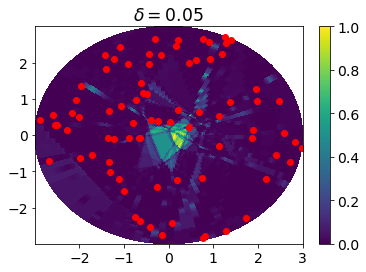

Mean square error: tensor(0.0034)
L-infinity error: tensor(0.4427)


In [2]:
MSE_history1 = torch.zeros([n_experiments, rounds])
L_inf_error_history1 = torch.zeros([n_experiments, rounds]) 

training_error_history1 = torch.zeros([n_experiments, rounds])
test_error_history1 = torch.zeros([n_experiments, rounds])

training_error_history1_max = torch.zeros([n_experiments, rounds])
test_error_history1_max = torch.zeros([n_experiments, rounds])


for j in range(n_experiments):
    # We initialise the NN
    NN1 = FCFF_3L([dim,20,20])
    training_params['optimizer'] = optim.SGD(NN1.parameters(), lr = .01, momentum = .2)
    
    ## Here we sample the collocation points and the boundary points.
    training_data_int = domain.rand_int_points(0., 80)
    training_data_bound = domain.rand_bound_points(40)
    
    training_params['epochs'] = 500
    training_params['batch_size'] = 20

    
    for i in range(rounds):
    
        training_params['alpha'] = alpha_list[i]
        training_params['delta'] = delta_list[i]
        
        total_loss, PDE_loss, boundary_loss = train_finite_sum(NN1, training_data_int, 
                                                               training_data_bound, training_params)

        MC_points = int(1e5) # Number of grid points for comparison with the ground truth
        MSE, L_inf = error_ball(NN1, max(radii), MC_points, display = False)
        
        with torch.no_grad():
            training_error = FD_loss(NN1, training_data_int, training_params)
            test_error = FD_loss(NN1, test_data, training_params)
        
        training_error_history1[j,i] = training_error.mean()
        test_error_history1[j,i] = test_error.mean()
        training_error_history1_max[j,i] = training_error.max().item()
        test_error_history1_max[j,i] = test_error.max().item()
        
        MSE_history1[j,i] = MSE
        L_inf_error_history1[j,i] = L_inf
    
        #epochs =  training_params['epochs']
        #plt.plot(torch.arange(epochs)+1, total_loss)
        #plt.plot(torch.arange(epochs)+1, PDE_loss)
        #plt.plot(torch.arange(epochs)+1, boundary_loss)
        #plt.legend(labels=['Total loss', 'PDE loss', 'BC loss'])
        #plt.show()
        
        X_axis = 0
        Y_axis = 1
        n_grid = 100
        
        #plot_2d_proj_disc(X_axis, Y_axis, NN1, n_grid, n_grid, radii)
        plot_2d_proj_w(X_axis, Y_axis, NN1, n_grid, radii, training_params,training_data_int)
        
        print('Mean square error:', MSE)
        print('L-infinity error:', L_inf)

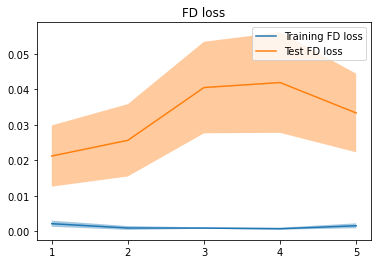

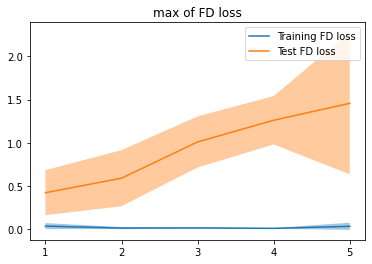

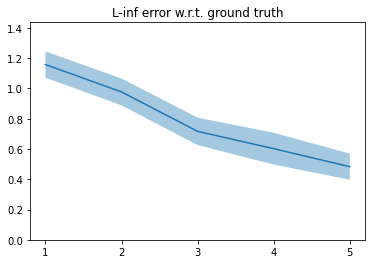

In [3]:
plt.plot(np.arange(rounds) , training_error_history1.mean(0))
plt.fill_between(np.arange(rounds) , 
                 training_error_history1.mean(0) - training_error_history1.std(0), 
                training_error_history1.mean(0) + training_error_history1.std(0), alpha=0.4)

plt.plot(np.arange(rounds) , test_error_history1.mean(0))
plt.fill_between(np.arange(rounds), 
                test_error_history1.mean(0) - test_error_history1.std(0),
                test_error_history1.mean(0) + test_error_history1.std(0), alpha = 0.4)

plt.legend(labels = ['Training FD loss', 'Test FD loss'])
plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
plt.title('FD loss')
plt.show()

plt.plot(np.arange(rounds) , training_error_history1_max.mean(0))
plt.fill_between(np.arange(rounds),
                 training_error_history1_max.mean(0) - training_error_history1_max.std(0),
                training_error_history1_max.mean(0) + training_error_history1_max.std(0),
                alpha = .4)

plt.plot(np.arange(rounds) , test_error_history1_max.mean(0))
plt.fill_between(np.arange(rounds),
                test_error_history1_max.mean(0) - test_error_history1_max.std(0),
                test_error_history1_max.mean(0) + test_error_history1_max.std(0),
                alpha = .4)
#plt.ylim(0, test_error_history1_max.max().item()+.1)
plt.legend(labels = ['Training FD loss', 'Test FD loss'])
plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
plt.title('max of FD loss')
plt.show()

plt.plot(np.arange(rounds), L_inf_error_history1.mean(0))
plt.fill_between(np.arange(rounds),
                L_inf_error_history1.mean(0) - L_inf_error_history1.std(0),
                L_inf_error_history1.mean(0) + L_inf_error_history1.std(0),
                alpha = .4)

plt.ylim(0, L_inf_error_history1.max().item()+0.1)
plt.title('L-inf error w.r.t. ground truth')
plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
plt.show()

# Fixed collocation points II


100%|██████████| 500/500 [00:11<00:00, 43.28it/s]
../visualization/disc_training.py:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(GridX.detach(), GridY.detach(), W.detach())


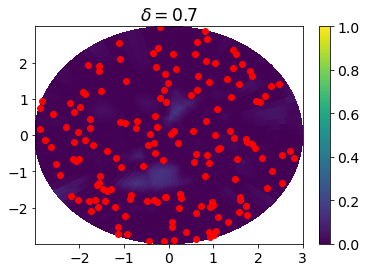

  1%|          | 4/500 [00:00<00:12, 39.97it/s]

Mean square error: tensor(0.0713)
L-infinity error: tensor(1.0970)


100%|██████████| 500/500 [00:11<00:00, 43.39it/s]


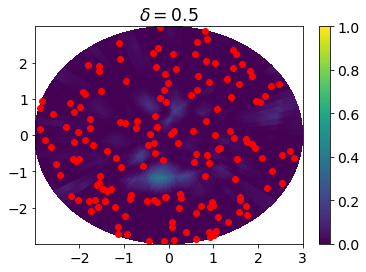

  1%|          | 5/500 [00:00<00:11, 42.53it/s]

Mean square error: tensor(0.0443)
L-infinity error: tensor(0.9025)


100%|██████████| 500/500 [00:11<00:00, 42.55it/s]


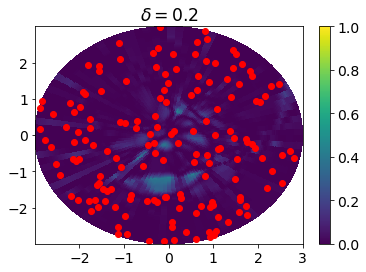

  1%|          | 3/500 [00:00<00:17, 28.60it/s]

Mean square error: tensor(0.0105)
L-infinity error: tensor(0.5408)


100%|██████████| 500/500 [00:15<00:00, 33.21it/s]


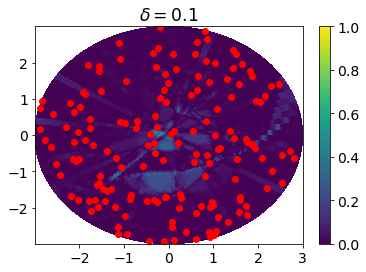

  1%|          | 4/500 [00:00<00:12, 38.21it/s]

Mean square error: tensor(0.0046)
L-infinity error: tensor(0.4216)


100%|██████████| 500/500 [00:12<00:00, 40.77it/s]


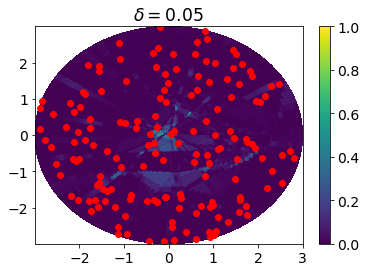

  1%|          | 4/500 [00:00<00:13, 37.10it/s]

Mean square error: tensor(0.0017)
L-infinity error: tensor(0.3150)


100%|██████████| 500/500 [00:11<00:00, 43.09it/s]


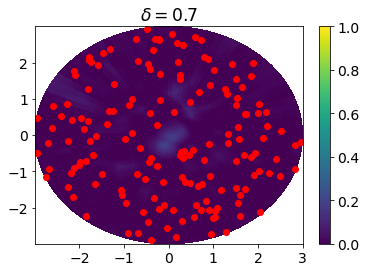

  1%|          | 5/500 [00:00<00:11, 43.23it/s]

Mean square error: tensor(0.0684)
L-infinity error: tensor(1.1549)


100%|██████████| 500/500 [00:11<00:00, 43.31it/s]


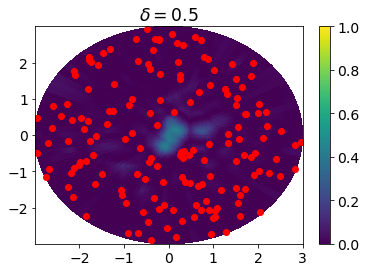

  1%|          | 5/500 [00:00<00:12, 41.09it/s]

Mean square error: tensor(0.0390)
L-infinity error: tensor(1.0049)


100%|██████████| 500/500 [00:11<00:00, 43.05it/s]


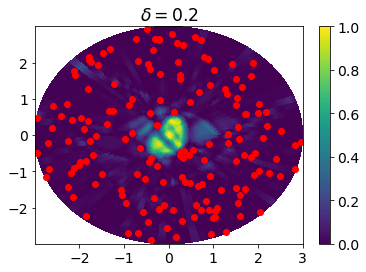

  1%|          | 5/500 [00:00<00:11, 43.54it/s]

Mean square error: tensor(0.0123)
L-infinity error: tensor(0.7713)


100%|██████████| 500/500 [00:11<00:00, 43.15it/s]


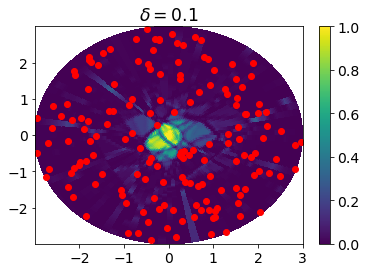

  1%|          | 5/500 [00:00<00:11, 43.86it/s]

Mean square error: tensor(0.0044)
L-infinity error: tensor(0.5878)


100%|██████████| 500/500 [00:11<00:00, 43.64it/s]


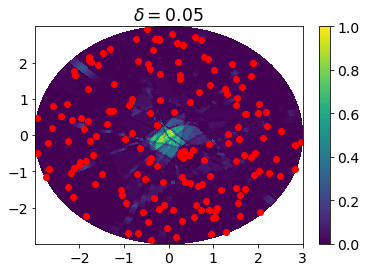

  1%|          | 5/500 [00:00<00:11, 44.35it/s]

Mean square error: tensor(0.0018)
L-infinity error: tensor(0.3883)


100%|██████████| 500/500 [00:11<00:00, 42.92it/s]


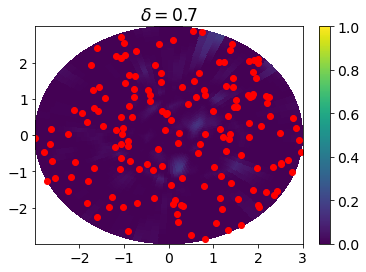

  1%|          | 5/500 [00:00<00:11, 43.00it/s]

Mean square error: tensor(0.0677)
L-infinity error: tensor(1.0910)


100%|██████████| 500/500 [00:11<00:00, 43.51it/s]


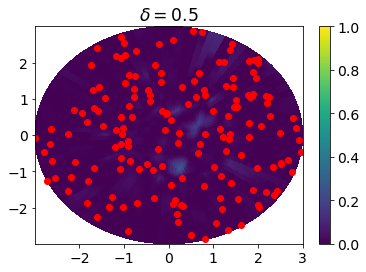

  1%|          | 5/500 [00:00<00:11, 42.68it/s]

Mean square error: tensor(0.0348)
L-infinity error: tensor(0.8779)


100%|██████████| 500/500 [00:11<00:00, 43.49it/s]


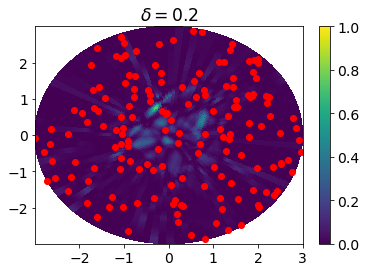

  1%|          | 5/500 [00:00<00:11, 43.39it/s]

Mean square error: tensor(0.0084)
L-infinity error: tensor(0.5527)


100%|██████████| 500/500 [00:11<00:00, 43.32it/s]


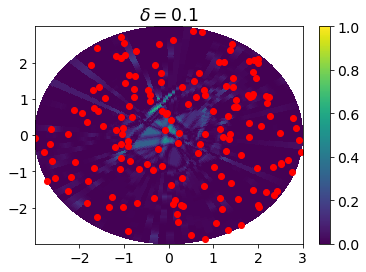

  1%|          | 5/500 [00:00<00:11, 43.31it/s]

Mean square error: tensor(0.0023)
L-infinity error: tensor(0.3882)


100%|██████████| 500/500 [00:11<00:00, 43.55it/s]


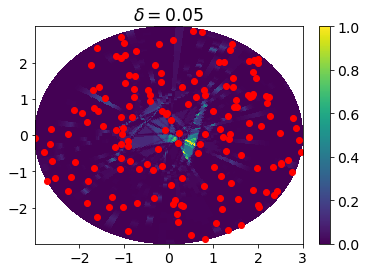

  1%|          | 5/500 [00:00<00:11, 44.12it/s]

Mean square error: tensor(0.0013)
L-infinity error: tensor(0.2712)


100%|██████████| 500/500 [00:11<00:00, 43.25it/s]


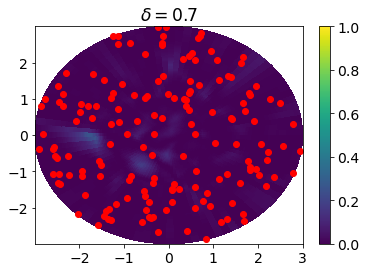

  1%|          | 4/500 [00:00<00:13, 37.53it/s]

Mean square error: tensor(0.0640)
L-infinity error: tensor(1.0785)


100%|██████████| 500/500 [00:11<00:00, 43.04it/s]


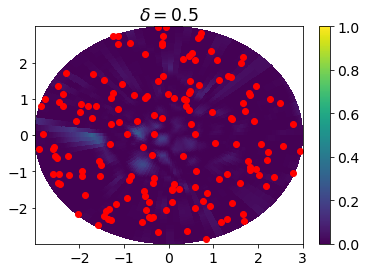

  1%|          | 5/500 [00:00<00:11, 44.31it/s]

Mean square error: tensor(0.0320)
L-infinity error: tensor(0.8708)


100%|██████████| 500/500 [00:11<00:00, 42.62it/s]


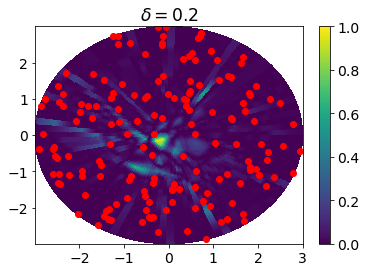

  1%|          | 5/500 [00:00<00:11, 43.30it/s]

Mean square error: tensor(0.0054)
L-infinity error: tensor(0.5209)


100%|██████████| 500/500 [00:11<00:00, 42.99it/s]


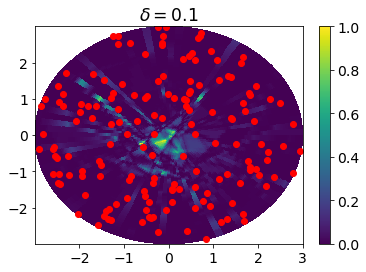

  1%|          | 5/500 [00:00<00:11, 43.95it/s]

Mean square error: tensor(0.0033)
L-infinity error: tensor(0.4409)


100%|██████████| 500/500 [00:11<00:00, 42.80it/s]


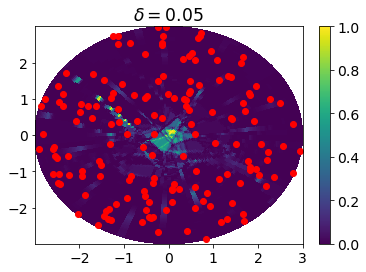

  1%|          | 5/500 [00:00<00:11, 43.21it/s]

Mean square error: tensor(0.0012)
L-infinity error: tensor(0.3621)


100%|██████████| 500/500 [00:11<00:00, 43.35it/s]


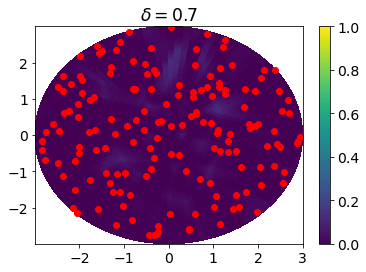

  1%|          | 5/500 [00:00<00:11, 43.43it/s]

Mean square error: tensor(0.0582)
L-infinity error: tensor(1.0490)


100%|██████████| 500/500 [00:11<00:00, 42.98it/s]


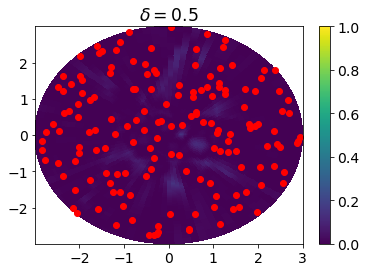

  1%|          | 3/500 [00:00<00:18, 27.12it/s]

Mean square error: tensor(0.0312)
L-infinity error: tensor(0.8463)


100%|██████████| 500/500 [00:14<00:00, 34.41it/s]


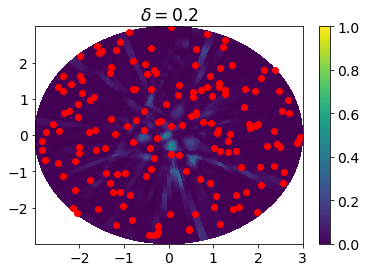

  1%|          | 5/500 [00:00<00:11, 42.29it/s]

Mean square error: tensor(0.0045)
L-infinity error: tensor(0.4933)


100%|██████████| 500/500 [00:12<00:00, 39.39it/s]


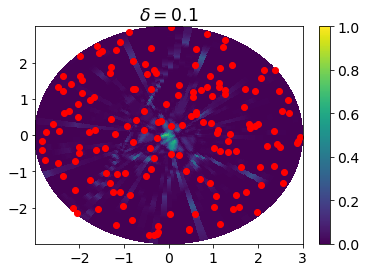

  1%|          | 4/500 [00:00<00:12, 39.43it/s]

Mean square error: tensor(0.0017)
L-infinity error: tensor(0.3619)


100%|██████████| 500/500 [00:11<00:00, 42.47it/s]


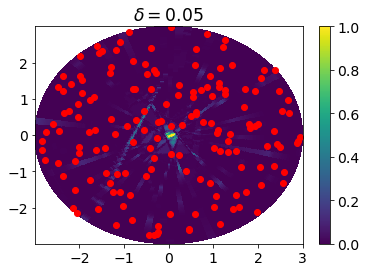

  1%|          | 5/500 [00:00<00:11, 42.58it/s]

Mean square error: tensor(0.0009)
L-infinity error: tensor(0.2483)


100%|██████████| 500/500 [00:11<00:00, 43.13it/s]


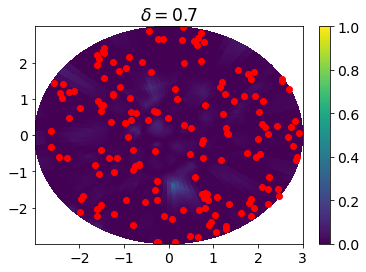

  1%|          | 4/500 [00:00<00:12, 39.71it/s]

Mean square error: tensor(0.0695)
L-infinity error: tensor(1.1067)


100%|██████████| 500/500 [00:11<00:00, 42.94it/s]


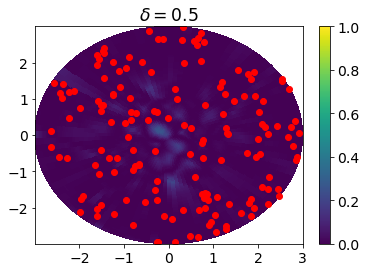

  1%|          | 5/500 [00:00<00:11, 43.20it/s]

Mean square error: tensor(0.0345)
L-infinity error: tensor(0.9154)


100%|██████████| 500/500 [00:12<00:00, 39.57it/s]


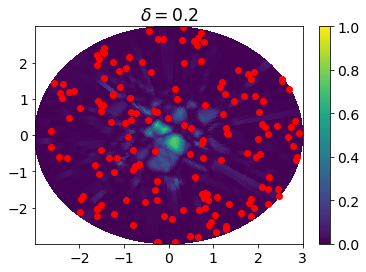

  1%|          | 4/500 [00:00<00:12, 39.90it/s]

Mean square error: tensor(0.0106)
L-infinity error: tensor(0.6285)


100%|██████████| 500/500 [00:12<00:00, 41.02it/s]


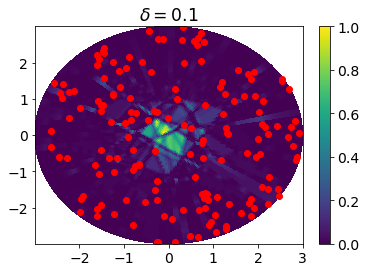

  1%|          | 4/500 [00:00<00:13, 36.78it/s]

Mean square error: tensor(0.0053)
L-infinity error: tensor(0.5416)


100%|██████████| 500/500 [00:11<00:00, 42.25it/s]


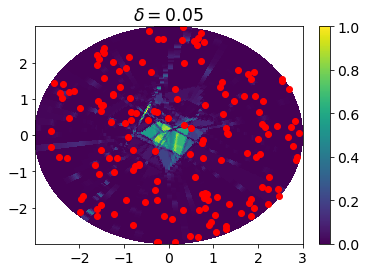

  1%|          | 4/500 [00:00<00:12, 39.43it/s]

Mean square error: tensor(0.0030)
L-infinity error: tensor(0.4153)


100%|██████████| 500/500 [00:11<00:00, 42.14it/s]


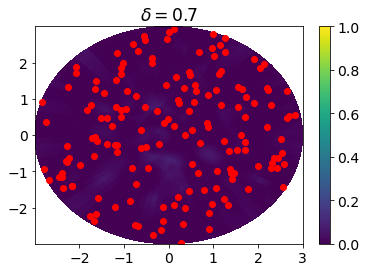

  1%|          | 5/500 [00:00<00:11, 42.24it/s]

Mean square error: tensor(0.0648)
L-infinity error: tensor(1.0824)


100%|██████████| 500/500 [00:11<00:00, 43.44it/s]


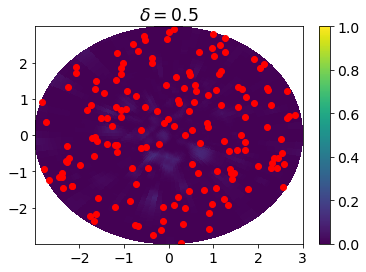

  1%|          | 5/500 [00:00<00:11, 43.50it/s]

Mean square error: tensor(0.0333)
L-infinity error: tensor(0.8732)


100%|██████████| 500/500 [00:11<00:00, 43.46it/s]


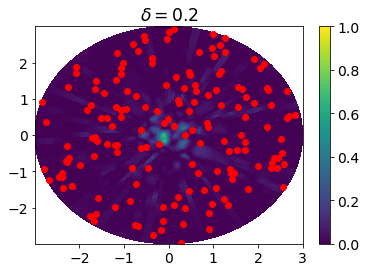

  1%|          | 5/500 [00:00<00:11, 42.46it/s]

Mean square error: tensor(0.0059)
L-infinity error: tensor(0.5447)


100%|██████████| 500/500 [00:11<00:00, 43.75it/s]


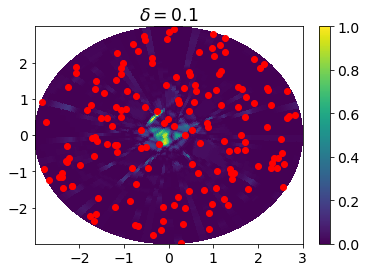

  1%|          | 4/500 [00:00<00:12, 39.87it/s]

Mean square error: tensor(0.0027)
L-infinity error: tensor(0.4291)


100%|██████████| 500/500 [00:11<00:00, 43.16it/s]


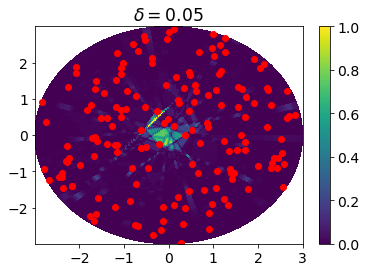

  1%|          | 5/500 [00:00<00:11, 42.65it/s]

Mean square error: tensor(0.0014)
L-infinity error: tensor(0.3528)


100%|██████████| 500/500 [00:11<00:00, 43.30it/s]


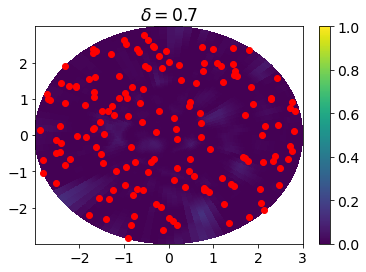

  1%|          | 5/500 [00:00<00:11, 41.36it/s]

Mean square error: tensor(0.0717)
L-infinity error: tensor(1.0884)


100%|██████████| 500/500 [00:11<00:00, 43.21it/s]


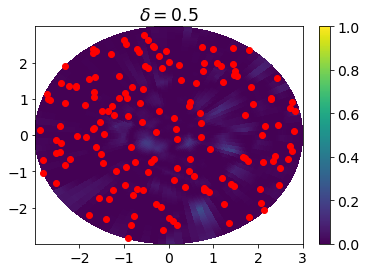

  1%|          | 5/500 [00:00<00:11, 42.45it/s]

Mean square error: tensor(0.0387)
L-infinity error: tensor(0.8794)


100%|██████████| 500/500 [00:11<00:00, 43.46it/s]


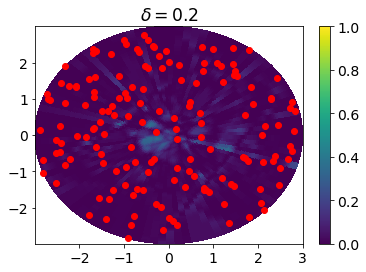

  1%|          | 5/500 [00:00<00:11, 42.03it/s]

Mean square error: tensor(0.0064)
L-infinity error: tensor(0.5291)


100%|██████████| 500/500 [00:11<00:00, 43.43it/s]


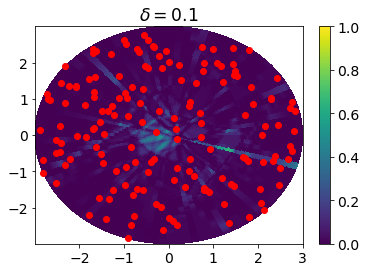

  1%|          | 5/500 [00:00<00:11, 42.12it/s]

Mean square error: tensor(0.0024)
L-infinity error: tensor(0.3826)


100%|██████████| 500/500 [00:11<00:00, 43.29it/s]


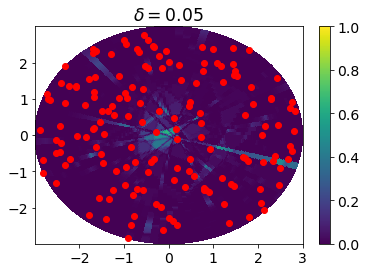

  1%|          | 5/500 [00:00<00:11, 42.32it/s]

Mean square error: tensor(0.0015)
L-infinity error: tensor(0.3088)


100%|██████████| 500/500 [00:11<00:00, 42.87it/s]


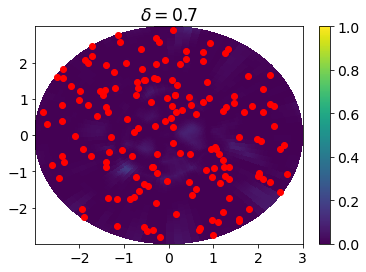

  1%|          | 5/500 [00:00<00:11, 42.64it/s]

Mean square error: tensor(0.0696)
L-infinity error: tensor(1.1008)


100%|██████████| 500/500 [00:11<00:00, 43.04it/s]


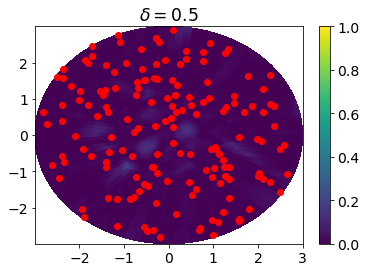

  1%|          | 5/500 [00:00<00:11, 42.78it/s]

Mean square error: tensor(0.0361)
L-infinity error: tensor(0.8962)


100%|██████████| 500/500 [00:11<00:00, 43.75it/s]


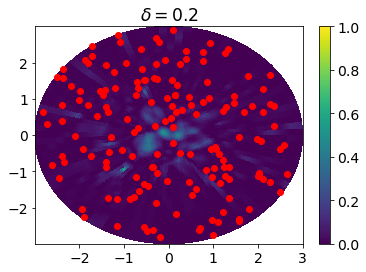

  1%|          | 5/500 [00:00<00:11, 42.60it/s]

Mean square error: tensor(0.0063)
L-infinity error: tensor(0.5634)


100%|██████████| 500/500 [00:11<00:00, 43.17it/s]


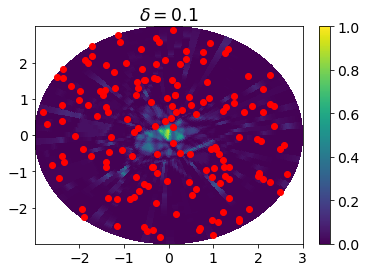

  1%|          | 5/500 [00:00<00:11, 42.04it/s]

Mean square error: tensor(0.0025)
L-infinity error: tensor(0.4477)


100%|██████████| 500/500 [00:11<00:00, 43.31it/s]


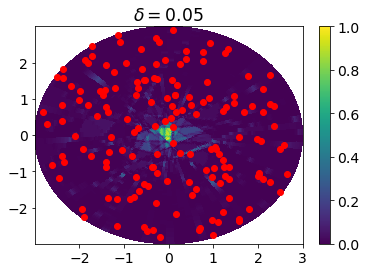

  1%|          | 5/500 [00:00<00:11, 42.64it/s]

Mean square error: tensor(0.0014)
L-infinity error: tensor(0.3437)


100%|██████████| 500/500 [00:11<00:00, 43.52it/s]


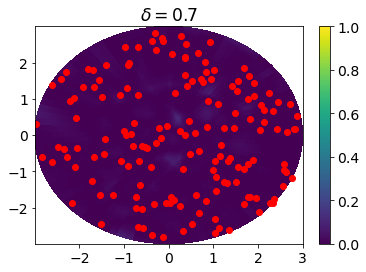

  1%|          | 5/500 [00:00<00:11, 43.06it/s]

Mean square error: tensor(0.0629)
L-infinity error: tensor(1.0704)


100%|██████████| 500/500 [00:11<00:00, 43.16it/s]


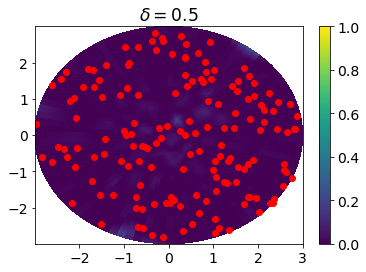

  1%|          | 5/500 [00:00<00:11, 42.85it/s]

Mean square error: tensor(0.0333)
L-infinity error: tensor(0.8674)


100%|██████████| 500/500 [00:11<00:00, 43.48it/s]


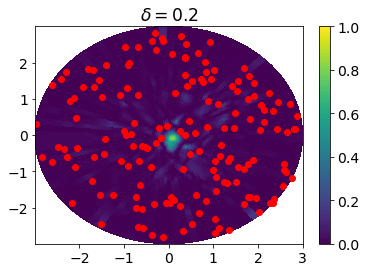

  1%|          | 5/500 [00:00<00:11, 42.34it/s]

Mean square error: tensor(0.0056)
L-infinity error: tensor(0.5219)


100%|██████████| 500/500 [00:17<00:00, 28.66it/s]


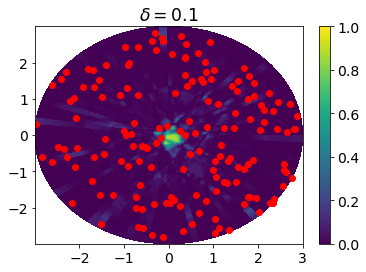

  0%|          | 2/500 [00:00<00:25, 19.25it/s]

Mean square error: tensor(0.0019)
L-infinity error: tensor(0.4062)


100%|██████████| 500/500 [00:13<00:00, 36.79it/s]


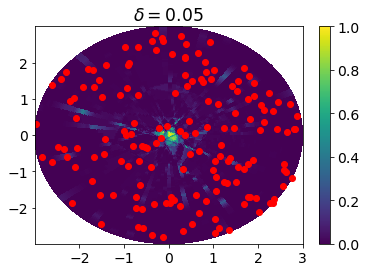

Mean square error: tensor(0.0007)
L-infinity error: tensor(0.2619)


In [4]:
MSE_history2 = torch.zeros([n_experiments, rounds])
L_inf_error_history2 = torch.zeros([n_experiments, rounds]) 

training_error_history2 = torch.zeros([n_experiments, rounds])
test_error_history2 = torch.zeros([n_experiments, rounds])

training_error_history2_max = torch.zeros([n_experiments, rounds])
test_error_history2_max = torch.zeros([n_experiments, rounds])


for j in range(n_experiments):
    # We initialise the NN
    NN2 = FCFF_3L([dim,20,20])
    training_params['optimizer'] = optim.SGD(NN2.parameters(), lr = .01, momentum = .2)
    
    ## Here we sample the collocation points and the boundary points.
    training_data_int = domain.rand_int_points(0., 160)
    training_data_bound = domain.rand_bound_points(80)
    
    training_params['epochs'] = 500
    training_params['batch_size'] = 20

    
    for i in range(rounds):
    
        training_params['alpha'] = alpha_list[i]
        training_params['delta'] = delta_list[i]
        
        total_loss, PDE_loss, boundary_loss = train_finite_sum(NN2, training_data_int, 
                                                               training_data_bound, training_params)

        MC_points = int(1e5) # Number of grid points for comparison with the ground truth
        MSE, L_inf = error_ball(NN2, max(radii), MC_points, display = False)
        
        with torch.no_grad():
            training_error = FD_loss(NN2, training_data_int, training_params)
            test_error = FD_loss(NN2, test_data, training_params)
        
        training_error_history2[j,i] = training_error.mean()
        test_error_history2[j,i] = test_error.mean()
        training_error_history2_max[j,i] = training_error.max().item()
        test_error_history2_max[j,i] = test_error.max().item()
        
        MSE_history2[j,i] = MSE
        L_inf_error_history2[j,i] = L_inf
    
        #epochs =  training_params['epochs']
        #plt.plot(torch.arange(epochs)+1, total_loss)
        #plt.plot(torch.arange(epochs)+1, PDE_loss)
        #plt.plot(torch.arange(epochs)+1, boundary_loss)
        #plt.legend(labels=['Total loss', 'PDE loss', 'BC loss'])
        #plt.show()
        
        X_axis = 0
        Y_axis = 1
        n_grid = 100
                        
        plot_2d_proj_w(X_axis, Y_axis, NN2, n_grid, radii, training_params,training_data_int)
        
        print('Mean square error:', MSE)
        print('L-infinity error:', L_inf)

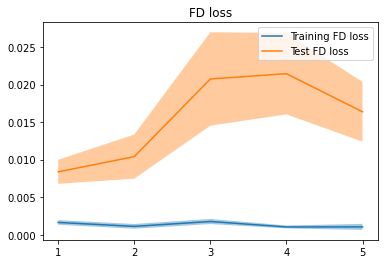

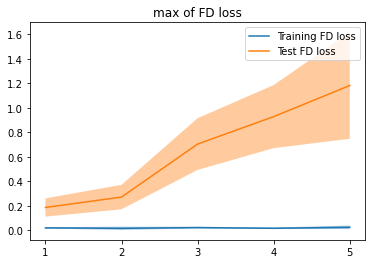

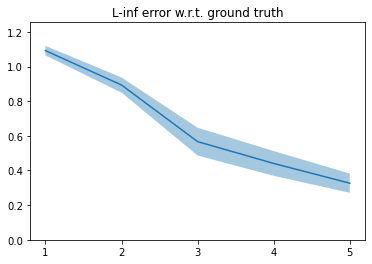

In [5]:
plt.plot(np.arange(rounds) , training_error_history2.mean(0))
plt.fill_between(np.arange(rounds) , 
                 training_error_history2.mean(0) - training_error_history2.std(0), 
                training_error_history2.mean(0) + training_error_history2.std(0), alpha=0.4)

plt.plot(np.arange(rounds) , test_error_history2.mean(0))
plt.fill_between(np.arange(rounds), 
                test_error_history2.mean(0) - test_error_history2.std(0),
                test_error_history2.mean(0) + test_error_history2.std(0), alpha = 0.4)

plt.legend(labels = ['Training FD loss', 'Test FD loss'])
plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
plt.title('FD loss')
plt.show()

plt.plot(np.arange(rounds) , training_error_history2_max.mean(0))
plt.fill_between(np.arange(rounds),
                 training_error_history2_max.mean(0) - training_error_history2_max.std(0),
                training_error_history2_max.mean(0) + training_error_history2_max.std(0),
                alpha = .4)

plt.plot(np.arange(rounds) , test_error_history2_max.mean(0))
plt.fill_between(np.arange(rounds),
                test_error_history2_max.mean(0) - test_error_history2_max.std(0),
                test_error_history2_max.mean(0) + test_error_history2_max.std(0),
                alpha = .4)
#plt.ylim(0, test_error_history1_max.max().item()+.1)
plt.legend(labels = ['Training FD loss', 'Test FD loss'])
plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
plt.title('max of FD loss')
plt.show()

plt.plot(np.arange(rounds), L_inf_error_history2.mean(0))
plt.fill_between(np.arange(rounds),
                L_inf_error_history2.mean(0) - L_inf_error_history2.std(0),
                L_inf_error_history2.mean(0) + L_inf_error_history2.std(0),
                alpha = .4)

plt.ylim(0, L_inf_error_history2.max().item()+0.1)
plt.title('L-inf error w.r.t. ground truth')
plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
plt.show()

# Re-sampling

100%|██████████| 2500/2500 [00:04<00:00, 581.37it/s]
../visualization/disc_training.py:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(GridX.detach(), GridY.detach(), W.detach())


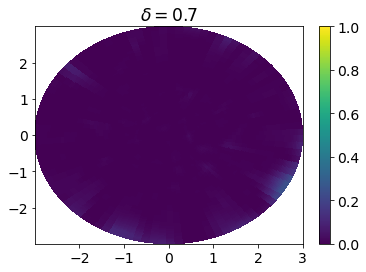

  2%|▏         | 59/2500 [00:00<00:04, 587.81it/s]

Mean square error: tensor(0.0676)
L-infinity error: tensor(1.0749)


100%|██████████| 2500/2500 [00:04<00:00, 608.47it/s]


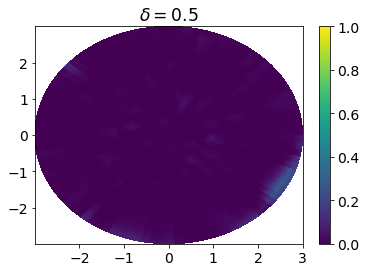

  2%|▏         | 41/2500 [00:00<00:06, 407.36it/s]

Mean square error: tensor(0.0343)
L-infinity error: tensor(0.8573)


100%|██████████| 2500/2500 [00:03<00:00, 664.52it/s]


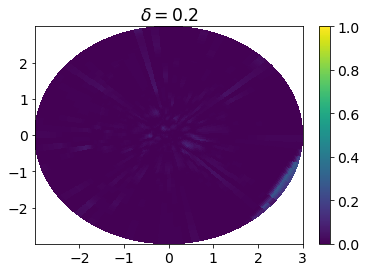

  3%|▎         | 66/2500 [00:00<00:03, 654.23it/s]

Mean square error: tensor(0.0068)
L-infinity error: tensor(0.4487)


100%|██████████| 2500/2500 [00:03<00:00, 659.30it/s]


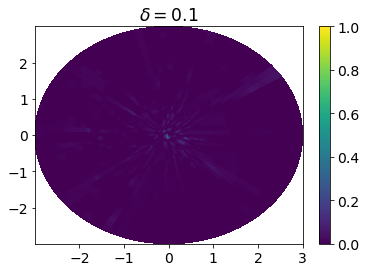

  2%|▏         | 60/2500 [00:00<00:04, 593.67it/s]

Mean square error: tensor(0.0025)
L-infinity error: tensor(0.2639)


100%|██████████| 2500/2500 [00:04<00:00, 515.36it/s]


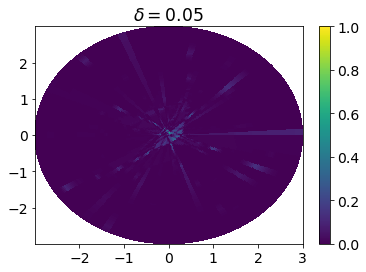

  1%|▏         | 36/2500 [00:00<00:07, 348.84it/s]

Mean square error: tensor(0.0018)
L-infinity error: tensor(0.2024)


100%|██████████| 2500/2500 [00:05<00:00, 475.90it/s]


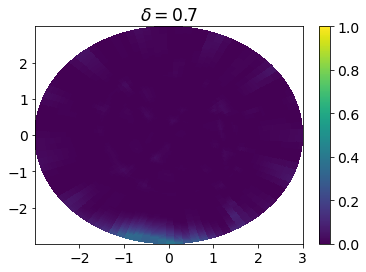

  2%|▏         | 42/2500 [00:00<00:05, 418.26it/s]

Mean square error: tensor(0.0701)
L-infinity error: tensor(1.0882)


100%|██████████| 2500/2500 [00:05<00:00, 478.26it/s]


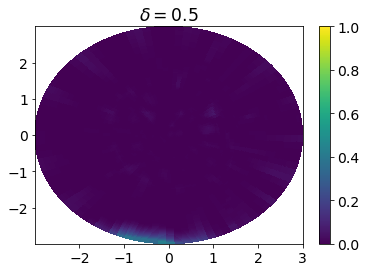

  3%|▎         | 63/2500 [00:00<00:03, 629.09it/s]

Mean square error: tensor(0.0345)
L-infinity error: tensor(0.8673)


100%|██████████| 2500/2500 [00:04<00:00, 610.09it/s]


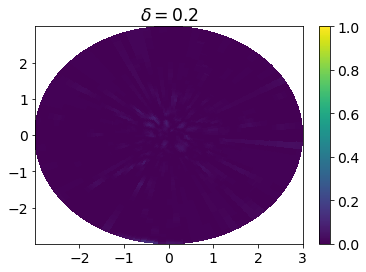

  3%|▎         | 66/2500 [00:00<00:03, 653.53it/s]

Mean square error: tensor(0.0057)
L-infinity error: tensor(0.4418)


100%|██████████| 2500/2500 [00:04<00:00, 578.16it/s]


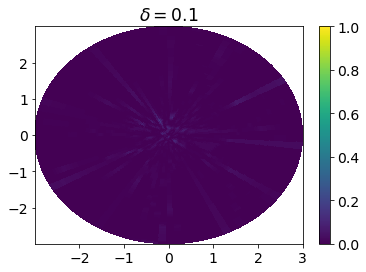

  3%|▎         | 69/2500 [00:00<00:03, 689.35it/s]

Mean square error: tensor(0.0023)
L-infinity error: tensor(0.2712)


100%|██████████| 2500/2500 [00:04<00:00, 542.26it/s]


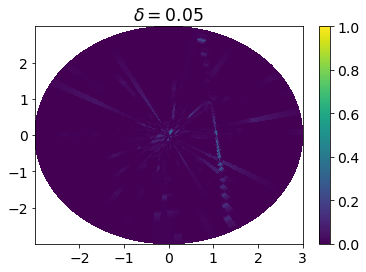

  2%|▏         | 49/2500 [00:00<00:05, 487.44it/s]

Mean square error: tensor(0.0019)
L-infinity error: tensor(0.1873)


100%|██████████| 2500/2500 [00:04<00:00, 593.15it/s]


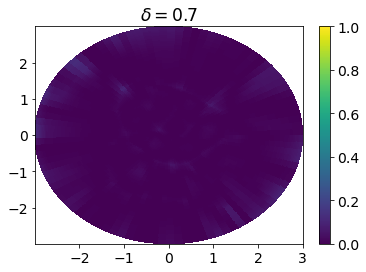

  2%|▏         | 39/2500 [00:00<00:06, 388.21it/s]

Mean square error: tensor(0.0727)
L-infinity error: tensor(1.0852)


100%|██████████| 2500/2500 [00:04<00:00, 536.52it/s]


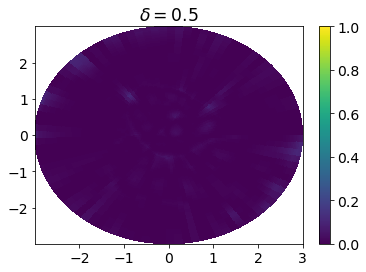

  3%|▎         | 66/2500 [00:00<00:03, 655.58it/s]

Mean square error: tensor(0.0369)
L-infinity error: tensor(0.8613)


100%|██████████| 2500/2500 [00:03<00:00, 704.31it/s]


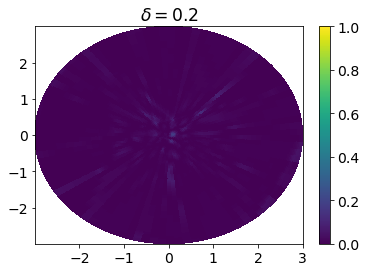

  3%|▎         | 69/2500 [00:00<00:03, 678.14it/s]

Mean square error: tensor(0.0088)
L-infinity error: tensor(0.4654)


100%|██████████| 2500/2500 [00:04<00:00, 564.22it/s]


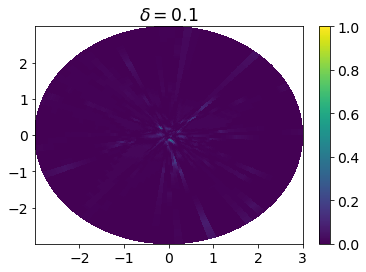

  2%|▏         | 59/2500 [00:00<00:04, 587.31it/s]

Mean square error: tensor(0.0023)
L-infinity error: tensor(0.2681)


100%|██████████| 2500/2500 [00:04<00:00, 553.48it/s]


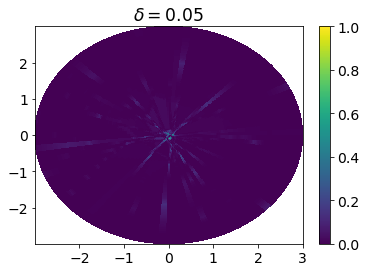

  1%|▏         | 34/2500 [00:00<00:07, 330.13it/s]

Mean square error: tensor(0.0024)
L-infinity error: tensor(0.2055)


100%|██████████| 2500/2500 [00:04<00:00, 516.24it/s]


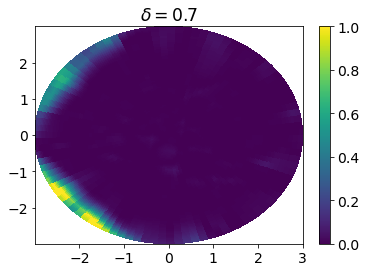

  2%|▏         | 48/2500 [00:00<00:05, 479.85it/s]

Mean square error: tensor(0.0724)
L-infinity error: tensor(1.0973)


100%|██████████| 2500/2500 [00:03<00:00, 644.85it/s]


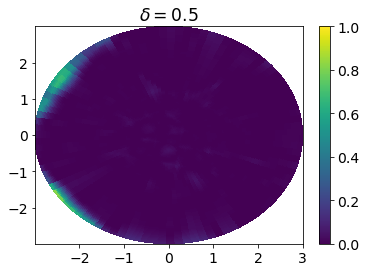

  3%|▎         | 65/2500 [00:00<00:03, 648.80it/s]

Mean square error: tensor(0.0361)
L-infinity error: tensor(0.8612)


100%|██████████| 2500/2500 [00:04<00:00, 575.74it/s]


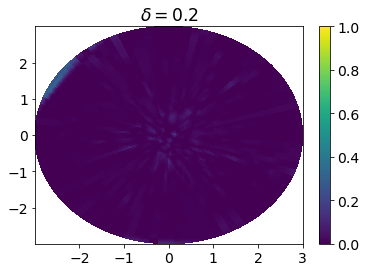

  2%|▏         | 55/2500 [00:00<00:04, 544.98it/s]

Mean square error: tensor(0.0060)
L-infinity error: tensor(0.4397)


100%|██████████| 2500/2500 [00:03<00:00, 681.97it/s]


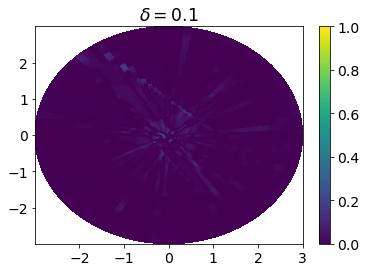

  3%|▎         | 63/2500 [00:00<00:03, 628.51it/s]

Mean square error: tensor(0.0022)
L-infinity error: tensor(0.2792)


100%|██████████| 2500/2500 [00:03<00:00, 663.30it/s]


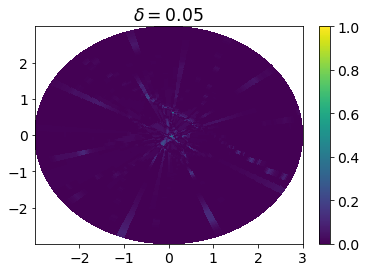

  3%|▎         | 69/2500 [00:00<00:03, 685.95it/s]

Mean square error: tensor(0.0019)
L-infinity error: tensor(0.1962)


100%|██████████| 2500/2500 [00:03<00:00, 646.09it/s]


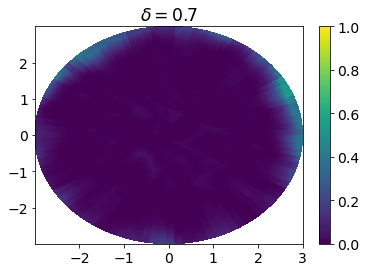

  3%|▎         | 64/2500 [00:00<00:03, 632.76it/s]

Mean square error: tensor(0.0735)
L-infinity error: tensor(1.0926)


100%|██████████| 2500/2500 [00:03<00:00, 668.33it/s]


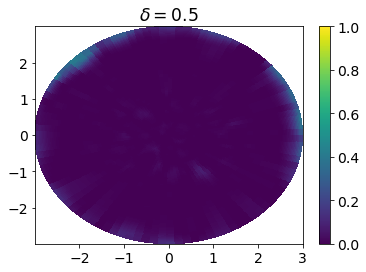

  3%|▎         | 65/2500 [00:00<00:03, 642.06it/s]

Mean square error: tensor(0.0351)
L-infinity error: tensor(0.8554)


100%|██████████| 2500/2500 [00:03<00:00, 631.81it/s]


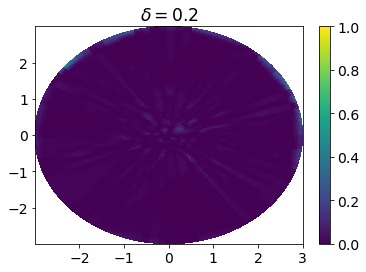

  2%|▏         | 59/2500 [00:00<00:04, 581.76it/s]

Mean square error: tensor(0.0072)
L-infinity error: tensor(0.4567)


100%|██████████| 2500/2500 [00:03<00:00, 634.42it/s]


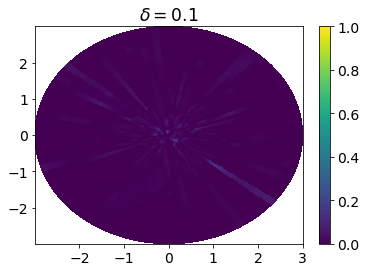

  3%|▎         | 68/2500 [00:00<00:03, 674.26it/s]

Mean square error: tensor(0.0017)
L-infinity error: tensor(0.2584)


100%|██████████| 2500/2500 [00:03<00:00, 630.10it/s]


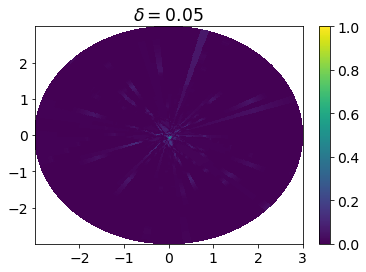

  2%|▏         | 61/2500 [00:00<00:04, 604.06it/s]

Mean square error: tensor(0.0008)
L-infinity error: tensor(0.1744)


100%|██████████| 2500/2500 [00:03<00:00, 625.24it/s]


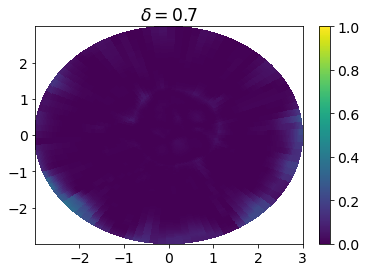

  3%|▎         | 64/2500 [00:00<00:03, 638.61it/s]

Mean square error: tensor(0.0749)
L-infinity error: tensor(1.0846)


100%|██████████| 2500/2500 [00:03<00:00, 642.33it/s]


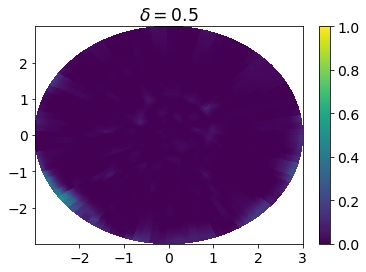

  2%|▏         | 47/2500 [00:00<00:05, 463.43it/s]

Mean square error: tensor(0.0366)
L-infinity error: tensor(0.8561)


100%|██████████| 2500/2500 [00:03<00:00, 641.34it/s]


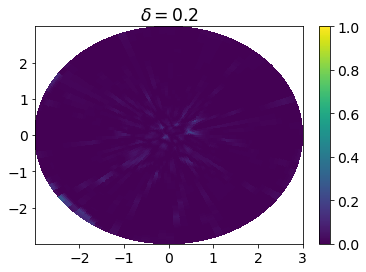

  3%|▎         | 66/2500 [00:00<00:03, 654.98it/s]

Mean square error: tensor(0.0078)
L-infinity error: tensor(0.4456)


100%|██████████| 2500/2500 [00:04<00:00, 566.59it/s]


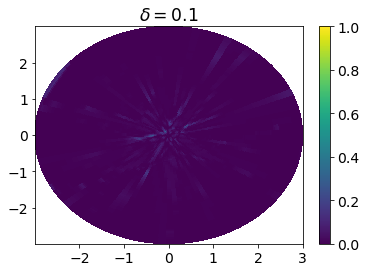

  2%|▏         | 62/2500 [00:00<00:03, 611.80it/s]

Mean square error: tensor(0.0023)
L-infinity error: tensor(0.2696)


100%|██████████| 2500/2500 [00:04<00:00, 601.66it/s]


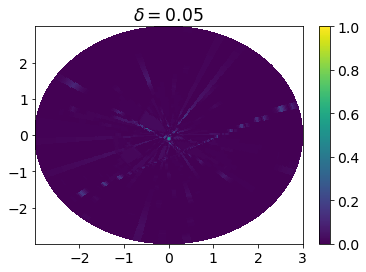

  2%|▏         | 60/2500 [00:00<00:04, 594.37it/s]

Mean square error: tensor(0.0012)
L-infinity error: tensor(0.1813)


100%|██████████| 2500/2500 [00:03<00:00, 669.55it/s]


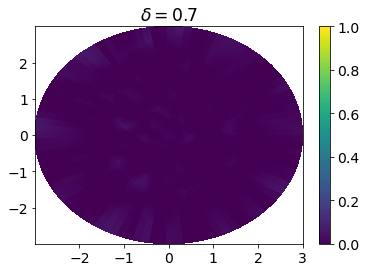

  3%|▎         | 70/2500 [00:00<00:03, 699.40it/s]

Mean square error: tensor(0.0694)
L-infinity error: tensor(1.1008)


100%|██████████| 2500/2500 [00:03<00:00, 640.26it/s]


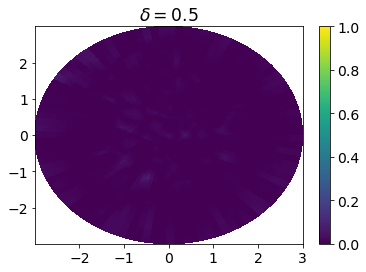

  3%|▎         | 65/2500 [00:00<00:03, 641.56it/s]

Mean square error: tensor(0.0358)
L-infinity error: tensor(0.8752)


100%|██████████| 2500/2500 [00:04<00:00, 592.81it/s]


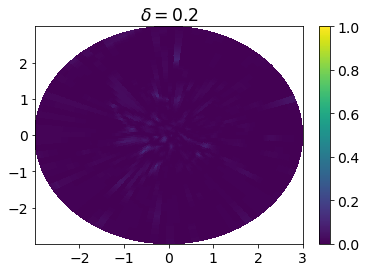

  3%|▎         | 73/2500 [00:00<00:03, 723.95it/s]

Mean square error: tensor(0.0058)
L-infinity error: tensor(0.4392)


100%|██████████| 2500/2500 [00:03<00:00, 666.65it/s]


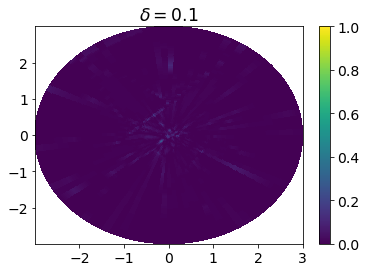

  3%|▎         | 66/2500 [00:00<00:03, 654.36it/s]

Mean square error: tensor(0.0027)
L-infinity error: tensor(0.2850)


100%|██████████| 2500/2500 [00:03<00:00, 679.37it/s]


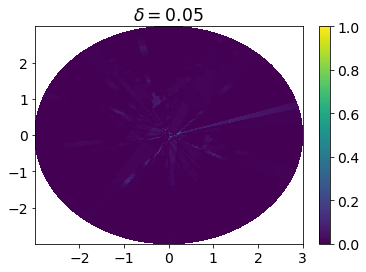

  3%|▎         | 63/2500 [00:00<00:03, 621.02it/s]

Mean square error: tensor(0.0014)
L-infinity error: tensor(0.1717)


100%|██████████| 2500/2500 [00:03<00:00, 627.20it/s]


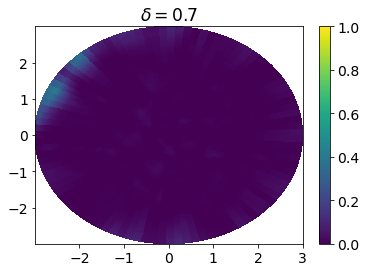

  3%|▎         | 69/2500 [00:00<00:03, 682.45it/s]

Mean square error: tensor(0.0691)
L-infinity error: tensor(1.0932)


100%|██████████| 2500/2500 [00:03<00:00, 640.95it/s]


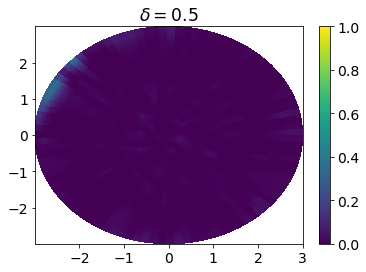

  3%|▎         | 63/2500 [00:00<00:03, 628.69it/s]

Mean square error: tensor(0.0355)
L-infinity error: tensor(0.8680)


100%|██████████| 2500/2500 [00:03<00:00, 645.31it/s]


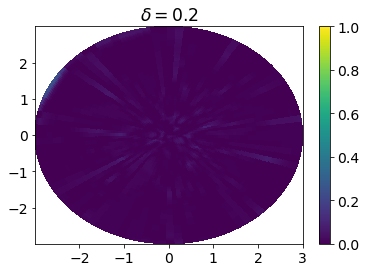

  3%|▎         | 67/2500 [00:00<00:03, 661.62it/s]

Mean square error: tensor(0.0072)
L-infinity error: tensor(0.4493)


100%|██████████| 2500/2500 [00:04<00:00, 616.55it/s]


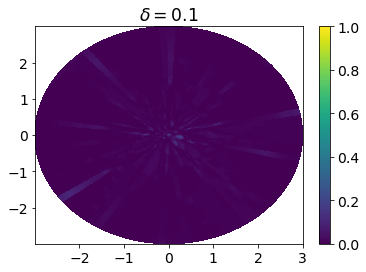

  3%|▎         | 65/2500 [00:00<00:03, 643.78it/s]

Mean square error: tensor(0.0018)
L-infinity error: tensor(0.2755)


100%|██████████| 2500/2500 [00:03<00:00, 650.32it/s]


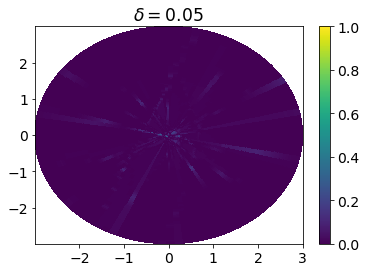

  3%|▎         | 66/2500 [00:00<00:03, 656.14it/s]

Mean square error: tensor(0.0014)
L-infinity error: tensor(0.1803)


100%|██████████| 2500/2500 [00:04<00:00, 600.65it/s]


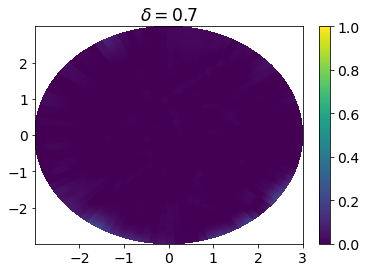

  3%|▎         | 64/2500 [00:00<00:03, 633.62it/s]

Mean square error: tensor(0.0693)
L-infinity error: tensor(1.0835)


100%|██████████| 2500/2500 [00:03<00:00, 663.37it/s]


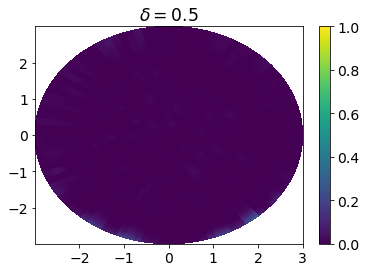

  3%|▎         | 67/2500 [00:00<00:03, 666.40it/s]

Mean square error: tensor(0.0344)
L-infinity error: tensor(0.8619)


100%|██████████| 2500/2500 [00:03<00:00, 668.24it/s]


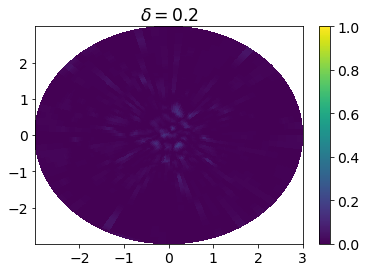

  3%|▎         | 68/2500 [00:00<00:03, 674.42it/s]

Mean square error: tensor(0.0060)
L-infinity error: tensor(0.4655)


100%|██████████| 2500/2500 [00:04<00:00, 619.96it/s]


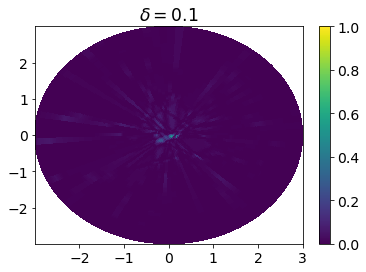

  3%|▎         | 64/2500 [00:00<00:03, 639.92it/s]

Mean square error: tensor(0.0029)
L-infinity error: tensor(0.3072)


100%|██████████| 2500/2500 [00:03<00:00, 634.66it/s]


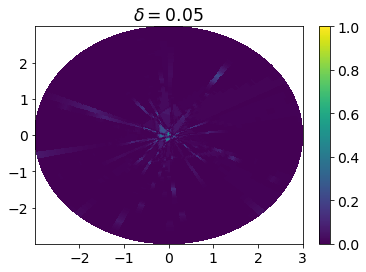

  3%|▎         | 64/2500 [00:00<00:03, 637.20it/s]

Mean square error: tensor(0.0017)
L-infinity error: tensor(0.2159)


100%|██████████| 2500/2500 [00:04<00:00, 586.64it/s]


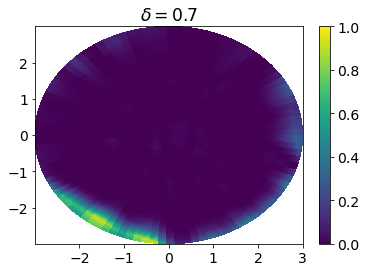

  3%|▎         | 66/2500 [00:00<00:03, 655.32it/s]

Mean square error: tensor(0.0722)
L-infinity error: tensor(1.1036)


100%|██████████| 2500/2500 [00:03<00:00, 664.67it/s]


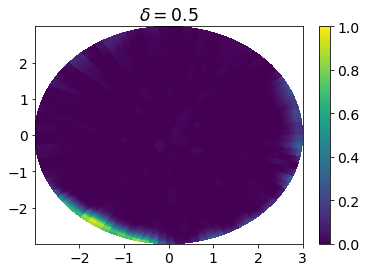

  3%|▎         | 70/2500 [00:00<00:03, 697.27it/s]

Mean square error: tensor(0.0347)
L-infinity error: tensor(0.8667)


100%|██████████| 2500/2500 [00:04<00:00, 596.73it/s]


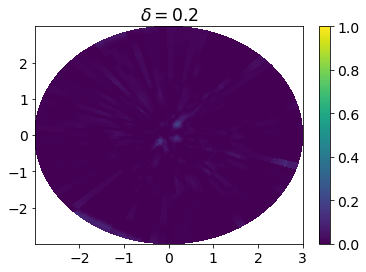

  2%|▏         | 59/2500 [00:00<00:04, 584.05it/s]

Mean square error: tensor(0.0066)
L-infinity error: tensor(0.4519)


100%|██████████| 2500/2500 [00:04<00:00, 601.31it/s]


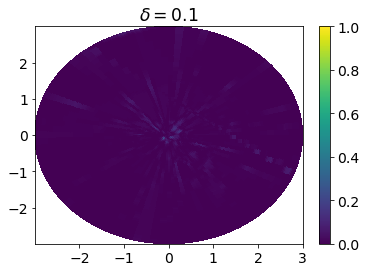

  3%|▎         | 64/2500 [00:00<00:03, 637.72it/s]

Mean square error: tensor(0.0026)
L-infinity error: tensor(0.2798)


100%|██████████| 2500/2500 [00:03<00:00, 640.39it/s]


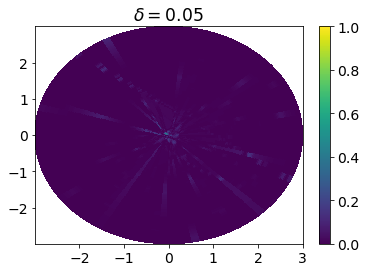

Mean square error: tensor(0.0008)
L-infinity error: tensor(0.1832)


In [19]:
MSE_history3 = torch.zeros([n_experiments, rounds])
L_inf_error_history3 = torch.zeros([n_experiments, rounds]) 

training_error_history3 = torch.zeros([n_experiments, rounds])
test_error_history3 = torch.zeros([n_experiments, rounds])

test_error_history3_max = torch.zeros([n_experiments, rounds])

from Training.training import train

training_params['n_coloc_points'] = 20
training_params['n_boundary_points'] = 8
n_ite = 2500
training_params['num_iterations'] = n_ite

for j in range(n_experiments):
    # We initialise the NN
    NN3 = FCFF_3L([dim,20,20])
    training_params['optimizer'] = optim.SGD(NN3.parameters(), lr = .01, momentum = .2)
    
    training_params['epochs'] = 500
    training_params['batch_size'] = 20

    
    for i in range(rounds):
    
        training_params['alpha'] = alpha_list[i]
        training_params['delta'] = delta_list[i]

        total_loss, PDE_loss, boundary_loss = train(NN3, domain, training_params)

        MC_points = int(1e5) # Number of grid points for comparison with the ground truth
        MSE, L_inf = error_ball(NN3, max(radii), MC_points, display = False)
        
        with torch.no_grad():
            #training_error = FD_loss(NN2, training_data_int, training_params)
            test_error = FD_loss(NN3, test_data, training_params)
        
        training_error_history3[j,i] = PDE_loss[-1]
        test_error_history3[j,i] = test_error.mean()
        test_error_history3_max[j,i] = test_error.max().item()
        
        MSE_history3[j,i] = MSE
        L_inf_error_history3[j,i] = L_inf
    
        #epochs =  training_params['epochs']
        #plt.plot(torch.arange(n_ite)+1, total_loss)
        #plt.plot(torch.arange(n_ite)+1, PDE_loss)
        #plt.plot(torch.arange(n_ite)+1, boundary_loss)
        #plt.legend(labels=['Total loss', 'PDE loss', 'BC loss'])
        #plt.show()
        
        X_axis = 0
        Y_axis = 1
        n_grid = 100
        
        plot_2d_proj_w(X_axis, Y_axis, NN3, n_grid, radii, training_params)
        
        print('Mean square error:', MSE)
        print('L-infinity error:', L_inf)

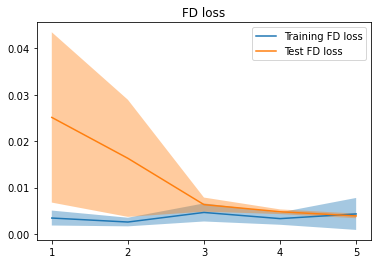

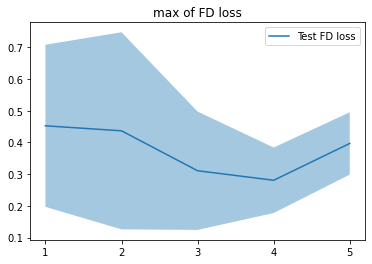

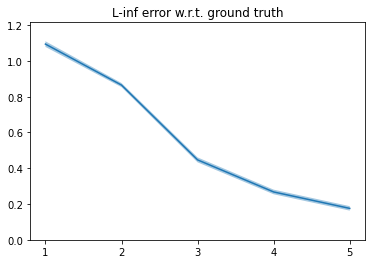

In [7]:
plt.plot(np.arange(rounds) , training_error_history3.mean(0))
plt.fill_between(np.arange(rounds) , 
                 training_error_history3.mean(0) - training_error_history3.std(0), 
                training_error_history3.mean(0) + training_error_history3.std(0), alpha=0.4)

plt.plot(np.arange(rounds) , test_error_history3.mean(0))
plt.fill_between(np.arange(rounds), 
                test_error_history3.mean(0) - test_error_history3.std(0),
                test_error_history3.mean(0) + test_error_history3.std(0), alpha = 0.4)

plt.legend(labels = ['Training FD loss', 'Test FD loss'])
plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
plt.title('FD loss')
plt.show()

plt.plot(np.arange(rounds) , test_error_history3_max.mean(0))
plt.fill_between(np.arange(rounds),
                test_error_history3_max.mean(0) - test_error_history3_max.std(0),
                test_error_history3_max.mean(0) + test_error_history3_max.std(0),
                alpha = .4)
plt.legend(labels = ['Test FD loss'])
plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
plt.title('max of FD loss')
plt.show()

plt.plot(np.arange(rounds), L_inf_error_history3.mean(0))
plt.fill_between(np.arange(rounds),
                L_inf_error_history3.mean(0) - L_inf_error_history3.std(0),
                L_inf_error_history3.mean(0) + L_inf_error_history3.std(0),
                alpha = .4)

plt.ylim(0, L_inf_error_history3.max().item()+0.1)
plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
plt.title('L-inf error w.r.t. ground truth')
plt.show()

# Comparison

In [1]:
plt.plot(np.arange(rounds) , test_error_history1.mean(0))
plt.fill_between(np.arange(rounds), 
                test_error_history1.mean(0) - test_error_history1.std(0),
                test_error_history1.mean(0) + test_error_history1.std(0), alpha = 0.4)

plt.plot(np.arange(rounds) , test_error_history2.mean(0))
plt.fill_between(np.arange(rounds), 
                test_error_history2.mean(0) - test_error_history2.std(0),
                test_error_history2.mean(0) + test_error_history2.std(0), alpha = 0.4)

plt.plot(np.arange(rounds) , test_error_history3.mean(0))
plt.fill_between(np.arange(rounds), 
                test_error_history3.mean(0) - test_error_history3.std(0),
                test_error_history3.mean(0) + test_error_history3.std(0), alpha = 0.4)

plt.legend(labels = ['$N_0 = 80$', '$N_0 = 160$', 'Re-sampling'], fontsize=14)
plt.xticks([i for i in range(rounds)], [ delta_list[i] for i in range(rounds)])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Mean square F.D. residual', fontsize = 'xx-large')
plt.show()


plt.plot(np.arange(rounds) , test_error_history1_max.mean(0))
plt.fill_between(np.arange(rounds),
                test_error_history1_max.mean(0) - test_error_history1_max.std(0),
                test_error_history1_max.mean(0) + test_error_history1_max.std(0),
                alpha = .4)

plt.plot(np.arange(rounds) , test_error_history2_max.mean(0))
plt.fill_between(np.arange(rounds),
                test_error_history2_max.mean(0) - test_error_history2_max.std(0),
                test_error_history2_max.mean(0) + test_error_history2_max.std(0),
                alpha = .4)

plt.plot(np.arange(rounds) , test_error_history3_max.mean(0))
plt.fill_between(np.arange(rounds),
                test_error_history3_max.mean(0) - test_error_history3_max.std(0),
                test_error_history3_max.mean(0) + test_error_history3_max.std(0),
                alpha = .4)

#plt.legend(labels = ['$N_0 = 80$', '$N_0 = 160$', 'Re-sampling'], fontsize=14)
plt.xticks([i for i in range(rounds)], [ delta_list[i] for i in range(rounds)])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Maximum of the F.D. residual', fontsize = 'xx-large')
plt.show()


plt.plot(np.arange(rounds), MSE_history1.log().mean(0))
plt.fill_between(np.arange(rounds),
                MSE_history1.log().mean(0) - MSE_history1.log10().std(0),
                MSE_history1.log().mean(0) + MSE_history1.log10().std(0),
                alpha = .4)

plt.plot(np.arange(rounds), MSE_history2.log().mean(0))
plt.fill_between(np.arange(rounds),
                MSE_history2.log().mean(0) - MSE_history2.log10().std(0),
                MSE_history2.log().mean(0) + MSE_history2.log10().std(0),
                alpha = .4)

plt.plot(np.arange(rounds), MSE_history3.log().mean(0))
plt.fill_between(np.arange(rounds),
                MSE_history3.log().mean(0) - MSE_history3.log10().std(0),
                MSE_history3.log().mean(0) + MSE_history3.log10().std(0),
                alpha = .4)

plt.legend(labels = ['$N_0 = 80$', '$N_0 = 160$', 'Re-sampling'], fontsize=14)
plt.xticks([i for i in range(rounds)], [ delta_list[i] for i in range(rounds)])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
plt.show()


plt.plot(np.arange(rounds), L_inf_error_history1.mean(0).log10())
plt.fill_between(np.arange(rounds),
                (L_inf_error_history1.mean(0) - L_inf_error_history1.std(0)).log10(),
                (L_inf_error_history1.mean(0) + L_inf_error_history1.std(0)).log10(),
                alpha = .4)

plt.plot(np.arange(rounds), L_inf_error_history2.mean(0).log10())
plt.fill_between(np.arange(rounds),
                (L_inf_error_history2.mean(0) - L_inf_error_history2.std(0)).log10(),
                (L_inf_error_history2.mean(0) + L_inf_error_history2.std(0)).log10(),
                alpha = .4)

plt.plot(np.arange(rounds), L_inf_error_history3.mean(0).log10())
plt.fill_between(np.arange(rounds),
                (L_inf_error_history3.mean(0) - L_inf_error_history3.std(0)).log10(),
                (L_inf_error_history3.mean(0) + L_inf_error_history3.std(0)).log10(),
                alpha = .4)

#plt.legend(labels = ['$N_0 = 80$', '$N_0 = 160$', 'Re-sampling'], fontsize=14)
plt.xticks([i for i in range(rounds)], [ delta_list[i] for i in range(rounds)])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')
plt.show()

NameError: name 'plt' is not defined